In [85]:
import tensorflow as tf

from tensorflow.keras.models import Sequential

from nltk.tag import StanfordPOSTagger

import pandas as pd

import numpy as np
import gensim
import sklearn

import nltk

from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter

import pandas as pd

import numpy as np
import gensim
import sklearn

import nltk

from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter

import string
import matplotlib.pyplot as plt

In [9]:
path_to_data = r"C:/Users/nivelaga/Documents/Berkeley/data/"

#training_data
SA_data = pd.read_csv(path_to_data+'/short_answer/train.tsv',sep='\t')
all_data = pd.read_csv(path_to_data+'/all/training_set_rel3.tsv',sep='\t', encoding='latin1')
transcripts_data = pd.read_csv(path_to_data+'/ted-talks/transcripts.csv',sep=',')

In [38]:
SentenceEnders=r'!.?'
SentenceContinuation=r',:;-'

def EssayLength(Essay):
    return len(Essay.split())

def CountSentences(Essay):
    count = lambda l1,l2: sum([1 for x in l1 if x in l2])
    return count(Essay, set(SentenceEnders))

def CountContinuation(Essay):
    count = lambda l1,l2: sum([1 for x in l1 if x in l2])
    return count(Essay, set(SentenceContinuation))

In [39]:
#calculate extra features
SA_data['average_score'] = (SA_data.Score1 + SA_data.Score2)/2

SA_data['EssayLength'] = SA_data.EssayText.apply(EssayLength)
SA_data['sentences'] = SA_data.EssayText.apply(CountSentences)

SA_data.loc[SA_data.sentences == 0, 'sentences'] = 1
SA_data['continuations'] = SA_data.EssayText.apply(CountContinuation)

SA_data['continuations_per_sentence'] = SA_data.continuations / SA_data.sentences

In [173]:
#fit LR on extra features
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept=True)

linreg.fit(SA_data[['EssayLength','sentences','continuations', 'continuations_per_sentence']], SA_data.average_score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [174]:
#print weights for each of these features
linreg.coef_

{'_residues': 9853.2251841501857,
 'coef_': array([ 0.01662758,  0.0022665 , -0.02598562,  0.08718313]),
 'copy_X': True,
 'fit_intercept': True,
 'intercept_': 0.19728358856879613,
 'n_jobs': 1,
 'normalize': False,
 'rank_': 4,
 'singular_': array([ 3574.90494429,   233.39395394,   190.40575296,    63.879678  ])}

In [23]:
#Tokenize data - DEPRECATED
#transcript_tokens = [nltk.word_tokenize(singlestr) for singlestr in transcripts_data.transcript]
#SA_tokens = [nltk.word_tokenize(singlestr) for singlestr in SA_data.EssayText]
#all_tokens = [nltk.word_tokenize(singlestr) for singlestr in all_data.essay]



In [12]:
#TFIDF extraction for each data set
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_SA = TfidfVectorizer()
tfidf_all = TfidfVectorizer()
tfidf_transcript = TfidfVectorizer()

SA_transformed = tfidf_SA.fit_transform(SA_data.EssayText)
all_transformed = tfidf_all.fit_transform(all_data.essay)
transcript_transformed = tfidf_transcript.fit_transform(transcripts_data.transcript)

In [177]:
#merge TFIDF features accross each of the datasets - DEPRECATED
allkey = {key for dictio in [tfidf_SA.vocabulary_.keys(), tfidf_all.vocabulary_.keys(), tfidf_transcript.vocabulary_.keys()] for key in dictio}

from tqdm import tqdm_notebook
tfidf_featurizationFrame = pd.DataFrame(index=allkey,columns=['SA_count','SA_idf','all_count','all_idf','transcript_count','transcript_idf'])

features_sa = tfidf_SA.get_feature_names()
features_all = tfidf_all.get_feature_names()
features_transcript = tfidf_transcript.get_feature_names()

#for key in tqdm_notebook(allkey):
    if key in features_sa:
        indExample = features_sa.index(key)
        tfidf_featurizationFrame.loc[key, 'SA_count'] = tfidf_SA.vocabulary_[key]
        tfidf_featurizationFrame.loc[key, 'SA_idf'] = tfidf_SA.idf_[indExample]
    if key in features_all:
        indExample = features_all.index(key)
        tfidf_featurizationFrame.loc[key, 'SA_count'] = tfidf_all.vocabulary_[key]
        tfidf_featurizationFrame.loc[key, 'SA_idf'] = tfidf_all.idf_[indExample]
    if key in features_transcript:
        indExample = features_transcript.index(key)
        tfidf_featurizationFrame.loc[key, 'SA_count'] = tfidf_transcript.vocabulary_[key]
        tfidf_featurizationFrame.loc[key, 'SA_idf'] = tfidf_transcript.idf_[indExample]
        

A Jupyter Widget


Exception ignored in: <bound method tqdm.__del__ of   0%|▏                                                                    | 230/86693 [1:41:20<634:56:37, 26.44s/it]>
Traceback (most recent call last):
  File "C:\Users\nivelaga\AppData\Local\Continuum\anaconda3\lib\site-packages\tqdm\_tqdm.py", line 885, in __del__
    self.close()
  File "C:\Users\nivelaga\AppData\Local\Continuum\anaconda3\lib\site-packages\tqdm\_tqdm.py", line 1090, in close
    self._decr_instances(self)
  File "C:\Users\nivelaga\AppData\Local\Continuum\anaconda3\lib\site-packages\tqdm\_tqdm.py", line 454, in _decr_instances
    cls.monitor.exit()
  File "C:\Users\nivelaga\AppData\Local\Continuum\anaconda3\lib\site-packages\tqdm\_monitor.py", line 52, in exit
    self.join()
  File "C:\Users\nivelaga\AppData\Local\Continuum\anaconda3\lib\threading.py", line 1053, in join
    raise RuntimeError("cannot join current thread")
RuntimeError: cannot join current thread


(array([  8.80600000e+03,   6.74600000e+03,   1.26200000e+03,
          2.79000000e+02,   7.50000000e+01,   2.20000000e+01,
          1.00000000e+01,   3.00000000e+00,   2.00000000e+00,
          2.00000000e+00]),
 array([  0.,   3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.]),
 <a list of 10 Patch objects>)

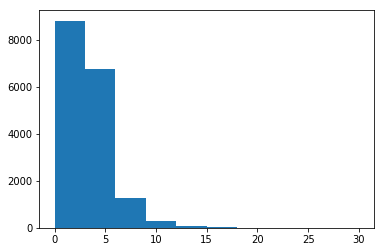

In [57]:
plt.hist(SA_data.sentences)

(array([  1.53900000e+04,   1.62900000e+03,   1.39000000e+02,
          4.00000000e+01,   3.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  0. ,   3.6,   7.2,  10.8,  14.4,  18. ,  21.6,  25.2,  28.8,
         32.4,  36. ]),
 <a list of 10 Patch objects>)

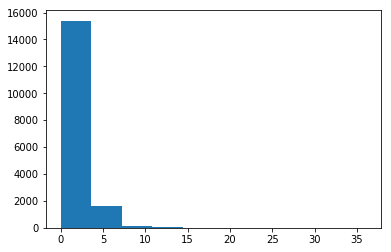

In [58]:
plt.hist(SA_data.continuations)

# Keras Modelling

In [299]:
import keras
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Embedding, Activation, Dropout, Conv1D, MaxPooling1D, Bidirectional, Flatten, TimeDistributed

from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

from sklearn.model_selection import train_test_split

In [29]:
keras.layers.Embedding

keras.layers.embeddings.Embedding

In [17]:
len(tfidf_SA.vocabulary_.keys())

15921

# Regression

In [70]:
#Processing short answer - DEPRECATED
train_sa_x,test_sa_x,train_sa_y,test_sa_y = train_test_split(np.asarray(SA_data.EssayText), np.asarray(SA_data.average_score),test_size=0.15)

max_words = len(tfidf_SA.vocabulary_.keys())
max_len = max(SA_data.EssayLength)

tok = Tokenizer(num_words = max_words)
tok.fit_on_texts(pd.Series(train_sa_x))
sequences = tok.texts_to_sequences(train_sa_x)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

sequences_test = tok.texts_to_sequences(test_sa_x)
sequences_test_matrix = sequence.pad_sequences(sequences_test,maxlen=max_len)

In [354]:
#predict domain1_score using essay
#toy set, just essay prompt 1
#huyen claims that the model determines proper score across sets
# preprocessing of all essays from sets 1-6 included
classification_data = all_data[all_data.essay_set < 7]

# score normalization
for i in range (1,7):
    if(i==1):
        classification_data.loc[classification_data.essay_set == i, 'adjusted_domain1_score'] = classification_data.loc[classification_data.essay_set == i, 'domain1_score']
    elif (i==2):
        classification_data.loc[classification_data.essay_set == i, 'adjusted_domain1_score'] = classification_data.loc[classification_data.essay_set == i, 'domain1_score'] * 2
    elif (i==3):
        classification_data.loc[classification_data.essay_set == i, 'adjusted_domain1_score'] = classification_data.loc[classification_data.essay_set == i, 'domain1_score'] * 4
    else:
        classification_data.loc[classification_data.essay_set == i, 'adjusted_domain1_score'] = classification_data.loc[classification_data.essay_set == i, 'domain1_score'] * 3
#classification_data.head(10)

class_Vect = TfidfVectorizer()
class_transform = class_Vect.fit_transform(classification_data.essay)

train_sa_x_class,test_sa_x_class,train_sa_y_class,test_sa_y_class = train_test_split(np.asarray(classification_data.essay), np.asarray(classification_data.adjusted_domain1_score),test_size=0.2)

max_words_class = len(class_Vect.vocabulary_.keys())
max_len_class = max(all_data.essay.apply(EssayLength))

tok_class = Tokenizer(num_words = max_words_class)
tok_class.fit_on_texts(pd.Series(train_sa_x_class))
sequences_class = tok_class.texts_to_sequences(train_sa_x_class)
sequences_matrix_class = sequence.pad_sequences(sequences_class,maxlen=max_len_class)

sequences_test_class = tok_class.texts_to_sequences(test_sa_x_class)
sequences_test_matrix_class = sequence.pad_sequences(sequences_test_class,maxlen=max_len_class)

In [428]:
#model definitions
def CNN():
    model_conv = Sequential()
    model_conv.add(tf.keras.layers.Embedding(max_words_class,300,input_length=max_len_class))
    model_conv.add(tf.keras.layers.Dropout(0.1))
    model_conv.add(tf.keras.layers.Conv1D(64, 5, activation='relu'))
    model_conv.add(tf.keras.layers.MaxPooling1D(pool_size=4))
    model_conv.add(tf.keras.layers.LSTM(100))
    model_conv.add(tf.keras.layers.Dense(100))
    model_conv.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model_conv.compile(optimizer=tf.train.AdamOptimizer(),loss='mse',metrics=['accuracy'])
    return model_conv

#bidirectional RNN is screwed up atm
def Bidirectional_RNN():
    inputs = Input(name='inputs',shape=[max_len_class])
    layer = Embedding(max_words,200,input_length=max_len_class)(inputs)
    layer = Bidirectional(LSTM(10))(layer)
    layer = Dense(32,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

def feedforward_NN():
    model_ff = Sequential()
    model_ff.add(tf.keras.layers.Embedding(max_words_class,200,input_length=max_len_class))
    model_ff.add(tf.keras.layers.Flatten())
    model_ff.add(tf.keras.layers.Dense(50,activation='tanh'))
    model_ff.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    model_ff.compile(optimizer=tf.train.AdamOptimizer(),loss='mse',metrics=['accuracy'])
    return model_ff

def RNN():
    model_rnn = Sequential()
    model_rnn.add(tf.keras.layers.Embedding(max_words_class,50,input_length=max_len_class))
    model_rnn.add(tf.keras.layers.LSTM(10))
    model_rnn.add(tf.keras.layers.Dense(1,name='out_layer'))
    model_rnn.compile(optimizer=tf.train.AdamOptimizer(),loss='mse',metrics=['accuracy'])
    return model_rnn

In [ ]:
feedforward = feedforward_NN()
feedforward.summary()

In [ ]:
feedforward.fit(sequences_matrix_class,train_sa_y_class, batch_size = 50, epochs=100, validation_split=0.15)

In [ ]:
#bidirectional_model = Bidirectional_RNN()
#bidirectional_model.summary()
#bidirectional_model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

#bidirectional_model.fit(sequences_matrix_class,train_sa_y_class, batch_size = 50, epochs=12, validation_split=0.15)

In [434]:
from keras.optimizers import Adam
CNN_model = CNN()
CNN_model.summary()
#CNN_model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_40 (Embedding)     (None, 1064, 300)         9174300   
_________________________________________________________________
dropout_19 (Dropout)         (None, 1064, 300)         0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 1060, 64)          96064     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 265, 64)           0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 100)               66000     
_________________________________________________________________
dense_55 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 101       
Total para

In [ ]:
CNN_model.fit(sequences_matrix_class,train_sa_y_class, batch_size = 50, epochs=100, validation_split=0.15)

Train on 7264 samples, validate on 1283 samples
Epoch 1/100
7264/7264 [==============================] - ETA: 11:41 - loss: 44.9312 - acc: 0.020 - ETA: 6:56 - loss: 42.7782 - acc: 0.010 - ETA: 5:24 - loss: 46.4172 - acc: 0.00 - ETA: 4:37 - loss: 47.5474 - acc: 0.00 - ETA: 4:08 - loss: 46.2194 - acc: 0.00 - ETA: 3:49 - loss: 46.2614 - acc: 0.00 - ETA: 3:35 - loss: 44.6130 - acc: 0.00 - ETA: 3:23 - loss: 44.1280 - acc: 0.00 - ETA: 3:15 - loss: 44.3457 - acc: 0.00 - ETA: 3:08 - loss: 44.2815 - acc: 0.00 - ETA: 3:01 - loss: 44.4671 - acc: 0.00 - ETA: 2:55 - loss: 44.2466 - acc: 0.00 - ETA: 2:51 - loss: 43.9816 - acc: 0.00 - ETA: 2:47 - loss: 44.0215 - acc: 0.00 - ETA: 2:43 - loss: 44.2748 - acc: 0.00 - ETA: 2:40 - loss: 44.0139 - acc: 0.00 - ETA: 2:37 - loss: 44.4978 - acc: 0.00 - ETA: 2:34 - loss: 44.8168 - acc: 0.00 - ETA: 2:31 - loss: 44.8128 - acc: 0.00 - ETA: 2:28 - loss: 45.0711 - acc: 1.0000e- - ETA: 2:26 - loss: 45.5144 - acc: 9.5238e- - ETA: 2:23 - loss: 45.4147 - acc: 9.0909e- - 

7264/7264 [==============================] - ETA: 2:12 - loss: 46.4000 - acc: 0.0000e+ - ETA: 2:16 - loss: 48.1900 - acc: 0.0000e+ - ETA: 2:12 - loss: 50.1467 - acc: 0.0000e+ - ETA: 2:11 - loss: 51.0800 - acc: 0.0000e+ - ETA: 2:10 - loss: 50.0160 - acc: 0.0000e+ - ETA: 2:08 - loss: 49.1600 - acc: 0.0000e+ - ETA: 2:07 - loss: 47.3057 - acc: 0.0000e+ - ETA: 2:06 - loss: 47.1200 - acc: 0.0000e+ - ETA: 2:05 - loss: 47.3978 - acc: 0.0000e+ - ETA: 2:04 - loss: 47.1840 - acc: 0.0000e+ - ETA: 2:04 - loss: 46.5091 - acc: 0.0000e+ - ETA: 2:04 - loss: 45.8933 - acc: 0.0000e+ - ETA: 2:03 - loss: 45.7215 - acc: 0.0000e+ - ETA: 2:02 - loss: 45.9572 - acc: 0.0000e+ - ETA: 2:01 - loss: 45.9813 - acc: 0.0000e+ - ETA: 2:00 - loss: 46.1300 - acc: 0.0000e+ - ETA: 1:59 - loss: 45.9635 - acc: 0.0000e+ - ETA: 1:59 - loss: 46.0500 - acc: 0.0000e+ - ETA: 1:58 - loss: 45.8853 - acc: 0.0000e+ - ETA: 1:57 - loss: 45.8190 - acc: 0.0000e+ - ETA: 1:56 - loss: 46.3057 - acc: 0.0000e+ - ETA: 1:55 - loss: 46.2791 - acc

7264/7264 [==============================] - ETA: 2:19 - loss: 55.2800 - acc: 0.0000e+ - ETA: 2:19 - loss: 49.2100 - acc: 0.0000e+ - ETA: 2:15 - loss: 45.9667 - acc: 0.0000e+ - ETA: 2:13 - loss: 44.7850 - acc: 0.0000e+ - ETA: 2:12 - loss: 45.6760 - acc: 0.0000e+ - ETA: 2:12 - loss: 45.0633 - acc: 0.0000e+ - ETA: 2:11 - loss: 44.9172 - acc: 0.0000e+ - ETA: 2:09 - loss: 44.6725 - acc: 0.0000e+ - ETA: 2:08 - loss: 44.8733 - acc: 0.0000e+ - ETA: 2:07 - loss: 44.7140 - acc: 0.0000e+ - ETA: 2:06 - loss: 43.6382 - acc: 0.0000e+ - ETA: 2:06 - loss: 43.8183 - acc: 0.0000e+ - ETA: 2:04 - loss: 44.3415 - acc: 0.0000e+ - ETA: 2:03 - loss: 44.2400 - acc: 0.0000e+ - ETA: 2:03 - loss: 44.0107 - acc: 0.0000e+ - ETA: 2:01 - loss: 43.9425 - acc: 0.0000e+ - ETA: 2:01 - loss: 43.6235 - acc: 0.0000e+ - ETA: 2:00 - loss: 43.8189 - acc: 0.0000e+ - ETA: 1:59 - loss: 43.7505 - acc: 0.0000e+ - ETA: 1:58 - loss: 44.0360 - acc: 0.0000e+ - ETA: 1:56 - loss: 44.0619 - acc: 0.0000e+ - ETA: 1:55 - loss: 43.6109 - acc

7264/7264 [==============================] - ETA: 2:13 - loss: 48.8600 - acc: 0.0000e+ - ETA: 2:11 - loss: 52.5300 - acc: 0.0000e+ - ETA: 2:09 - loss: 50.5867 - acc: 0.0000e+ - ETA: 2:09 - loss: 47.8100 - acc: 0.0000e+ - ETA: 2:08 - loss: 47.7280 - acc: 0.0000e+ - ETA: 2:07 - loss: 46.9033 - acc: 0.0000e+ - ETA: 2:06 - loss: 47.5229 - acc: 0.0000e+ - ETA: 2:04 - loss: 46.7650 - acc: 0.0000e+ - ETA: 2:04 - loss: 46.9511 - acc: 0.0000e+ - ETA: 2:03 - loss: 47.7480 - acc: 0.0000e+ - ETA: 2:02 - loss: 46.6164 - acc: 0.0000e+ - ETA: 2:01 - loss: 46.7050 - acc: 0.0000e+ - ETA: 2:00 - loss: 46.7169 - acc: 0.0000e+ - ETA: 1:59 - loss: 46.8457 - acc: 0.0000e+ - ETA: 1:58 - loss: 47.4253 - acc: 0.0000e+ - ETA: 1:57 - loss: 47.0588 - acc: 0.0000e+ - ETA: 1:56 - loss: 46.9271 - acc: 0.0000e+ - ETA: 1:55 - loss: 47.0167 - acc: 0.0000e+ - ETA: 1:55 - loss: 46.8137 - acc: 0.0000e+ - ETA: 1:54 - loss: 46.8570 - acc: 0.0000e+ - ETA: 1:53 - loss: 47.4952 - acc: 0.0000e+ - ETA: 1:52 - loss: 47.4500 - acc

7264/7264 [==============================] - ETA: 2:13 - loss: 47.7400 - acc: 0.0000e+ - ETA: 2:12 - loss: 43.8400 - acc: 0.0000e+ - ETA: 2:13 - loss: 44.2133 - acc: 0.0000e+ - ETA: 2:12 - loss: 45.9600 - acc: 0.0000e+ - ETA: 2:11 - loss: 46.7800 - acc: 0.0000e+ - ETA: 2:10 - loss: 46.3667 - acc: 0.0000e+ - ETA: 2:09 - loss: 46.6000 - acc: 0.0000e+ - ETA: 2:08 - loss: 46.7100 - acc: 0.0000e+ - ETA: 2:07 - loss: 46.4378 - acc: 0.0000e+ - ETA: 2:07 - loss: 45.5360 - acc: 0.0000e+ - ETA: 2:07 - loss: 44.9818 - acc: 0.0000e+ - ETA: 2:05 - loss: 46.0867 - acc: 0.0000e+ - ETA: 2:04 - loss: 45.7200 - acc: 0.0000e+ - ETA: 2:03 - loss: 45.7214 - acc: 0.0000e+ - ETA: 2:03 - loss: 45.4000 - acc: 0.0000e+ - ETA: 2:03 - loss: 46.2363 - acc: 0.0000e+ - ETA: 2:02 - loss: 46.3424 - acc: 0.0000e+ - ETA: 2:01 - loss: 46.2022 - acc: 0.0000e+ - ETA: 2:00 - loss: 46.3769 - acc: 0.0000e+ - ETA: 1:59 - loss: 46.1890 - acc: 0.0000e+ - ETA: 1:58 - loss: 46.1019 - acc: 0.0000e+ - ETA: 1:57 - loss: 45.9627 - acc

7264/7264 [==============================] - ETA: 2:15 - loss: 50.1200 - acc: 0.0000e+ - ETA: 2:11 - loss: 48.9400 - acc: 0.0000e+ - ETA: 2:10 - loss: 47.9400 - acc: 0.0000e+ - ETA: 2:08 - loss: 46.9200 - acc: 0.0000e+ - ETA: 2:08 - loss: 45.5800 - acc: 0.0000e+ - ETA: 2:07 - loss: 45.2800 - acc: 0.0000e+ - ETA: 2:05 - loss: 46.2429 - acc: 0.0000e+ - ETA: 2:05 - loss: 45.7325 - acc: 0.0000e+ - ETA: 2:04 - loss: 45.6644 - acc: 0.0000e+ - ETA: 2:03 - loss: 46.0800 - acc: 0.0000e+ - ETA: 2:02 - loss: 46.1691 - acc: 0.0000e+ - ETA: 2:01 - loss: 46.2867 - acc: 0.0000e+ - ETA: 2:00 - loss: 46.7354 - acc: 0.0000e+ - ETA: 1:59 - loss: 46.5371 - acc: 0.0000e+ - ETA: 1:58 - loss: 46.1587 - acc: 0.0000e+ - ETA: 1:58 - loss: 45.7963 - acc: 0.0000e+ - ETA: 1:57 - loss: 45.6365 - acc: 0.0000e+ - ETA: 1:56 - loss: 45.3100 - acc: 0.0000e+ - ETA: 1:54 - loss: 45.5000 - acc: 0.0000e+ - ETA: 1:54 - loss: 45.5610 - acc: 0.0000e+ - ETA: 1:53 - loss: 45.4514 - acc: 0.0000e+ - ETA: 1:52 - loss: 45.4891 - acc

7264/7264 [==============================] - ETA: 2:11 - loss: 41.5000 - acc: 0.0000e+ - ETA: 2:16 - loss: 44.8000 - acc: 0.0000e+ - ETA: 2:15 - loss: 44.7467 - acc: 0.0000e+ - ETA: 2:14 - loss: 45.0200 - acc: 0.0000e+ - ETA: 2:12 - loss: 45.5880 - acc: 0.0000e+ - ETA: 2:13 - loss: 44.2400 - acc: 0.0000e+ - ETA: 2:14 - loss: 44.9286 - acc: 0.0000e+ - ETA: 2:12 - loss: 43.5750 - acc: 0.0000e+ - ETA: 2:11 - loss: 43.6644 - acc: 0.0000e+ - ETA: 2:11 - loss: 43.4800 - acc: 0.0000e+ - ETA: 2:10 - loss: 43.1509 - acc: 0.0000e+ - ETA: 2:09 - loss: 43.6950 - acc: 0.0000e+ - ETA: 2:08 - loss: 44.2477 - acc: 0.0000e+ - ETA: 2:08 - loss: 44.0443 - acc: 0.0000e+ - ETA: 2:07 - loss: 43.9813 - acc: 0.0000e+ - ETA: 2:06 - loss: 44.0388 - acc: 0.0000e+ - ETA: 2:05 - loss: 43.8494 - acc: 0.0000e+ - ETA: 2:04 - loss: 44.2911 - acc: 0.0000e+ - ETA: 2:03 - loss: 44.0937 - acc: 0.0000e+ - ETA: 2:02 - loss: 44.1920 - acc: 0.0000e+ - ETA: 2:00 - loss: 44.4086 - acc: 0.0000e+ - ETA: 1:59 - loss: 44.3755 - acc

7264/7264 [==============================] - ETA: 2:21 - loss: 47.3200 - acc: 0.0000e+ - ETA: 2:20 - loss: 50.2900 - acc: 0.0000e+ - ETA: 2:37 - loss: 49.5600 - acc: 0.0000e+ - ETA: 2:49 - loss: 46.8350 - acc: 0.0000e+ - ETA: 2:49 - loss: 45.7760 - acc: 0.0000e+ - ETA: 2:47 - loss: 45.9733 - acc: 0.0000e+ - ETA: 2:43 - loss: 46.2000 - acc: 0.0000e+ - ETA: 2:40 - loss: 47.3000 - acc: 0.0000e+ - ETA: 2:40 - loss: 47.7289 - acc: 0.0000e+ - ETA: 2:38 - loss: 47.6940 - acc: 0.0000e+ - ETA: 2:36 - loss: 48.0309 - acc: 0.0000e+ - ETA: 2:32 - loss: 48.5100 - acc: 0.0000e+ - ETA: 2:30 - loss: 47.8492 - acc: 0.0000e+ - ETA: 2:27 - loss: 47.3857 - acc: 0.0000e+ - ETA: 2:26 - loss: 47.5680 - acc: 0.0000e+ - ETA: 2:25 - loss: 47.0738 - acc: 0.0000e+ - ETA: 2:23 - loss: 47.1247 - acc: 0.0000e+ - ETA: 2:21 - loss: 46.9267 - acc: 0.0000e+ - ETA: 2:19 - loss: 47.0916 - acc: 0.0000e+ - ETA: 2:17 - loss: 46.9740 - acc: 0.0000e+ - ETA: 2:16 - loss: 46.8495 - acc: 0.0000e+ - ETA: 2:14 - loss: 46.6673 - acc

7264/7264 [==============================] - ETA: 2:14 - loss: 47.6600 - acc: 0.0000e+ - ETA: 2:12 - loss: 48.1500 - acc: 0.0000e+ - ETA: 2:12 - loss: 49.9200 - acc: 0.0000e+ - ETA: 2:10 - loss: 48.9850 - acc: 0.0000e+ - ETA: 2:09 - loss: 48.4120 - acc: 0.0000e+ - ETA: 2:08 - loss: 47.8367 - acc: 0.0000e+ - ETA: 2:07 - loss: 48.0057 - acc: 0.0000e+ - ETA: 2:06 - loss: 48.5000 - acc: 0.0000e+ - ETA: 2:05 - loss: 48.1844 - acc: 0.0000e+ - ETA: 2:04 - loss: 47.5480 - acc: 0.0000e+ - ETA: 2:03 - loss: 47.4527 - acc: 0.0000e+ - ETA: 2:01 - loss: 47.5267 - acc: 0.0000e+ - ETA: 2:00 - loss: 47.6954 - acc: 0.0000e+ - ETA: 1:59 - loss: 47.4343 - acc: 0.0000e+ - ETA: 1:58 - loss: 47.3133 - acc: 0.0000e+ - ETA: 1:57 - loss: 47.1175 - acc: 0.0000e+ - ETA: 1:56 - loss: 46.7271 - acc: 0.0000e+ - ETA: 1:55 - loss: 46.7778 - acc: 0.0000e+ - ETA: 1:54 - loss: 46.6632 - acc: 0.0000e+ - ETA: 1:53 - loss: 46.5520 - acc: 0.0000e+ - ETA: 1:52 - loss: 46.5790 - acc: 0.0000e+ - ETA: 1:51 - loss: 46.6245 - acc

3600/7264 [=============>................] - ETA: 2:12 - loss: 54.8600 - acc: 0.0000e+ - ETA: 2:11 - loss: 48.1000 - acc: 0.0000e+ - ETA: 2:11 - loss: 47.4733 - acc: 0.0000e+ - ETA: 2:09 - loss: 48.8800 - acc: 0.0000e+ - ETA: 2:10 - loss: 47.0080 - acc: 0.0000e+ - ETA: 2:09 - loss: 44.7867 - acc: 0.0000e+ - ETA: 2:08 - loss: 43.5629 - acc: 0.0000e+ - ETA: 2:06 - loss: 43.4525 - acc: 0.0000e+ - ETA: 2:06 - loss: 42.8511 - acc: 0.0000e+ - ETA: 2:05 - loss: 43.4000 - acc: 0.0000e+ - ETA: 2:04 - loss: 43.6055 - acc: 0.0000e+ - ETA: 2:03 - loss: 43.8433 - acc: 0.0000e+ - ETA: 2:02 - loss: 43.7677 - acc: 0.0000e+ - ETA: 2:01 - loss: 43.5471 - acc: 0.0000e+ - ETA: 2:00 - loss: 44.1640 - acc: 0.0000e+ - ETA: 1:59 - loss: 44.4750 - acc: 0.0000e+ - ETA: 1:58 - loss: 44.7224 - acc: 0.0000e+ - ETA: 1:57 - loss: 45.0700 - acc: 0.0000e+ - ETA: 1:57 - loss: 44.7526 - acc: 0.0000e+ - ETA: 1:56 - loss: 44.6430 - acc: 0.0000e+ - ETA: 1:56 - loss: 44.8362 - acc: 0.0000e+ - ETA: 1:55 - loss: 44.9691 - acc

In [ ]:
from keras.optimizers import RMSprop

model = RNN()
model.summary()
model.compile(loss='mse',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
model.fit(sequences_matrix,train_sa_y, batch_size = 100, epochs=100, validation_split=0.2)

In [ ]:
#merge regression predictions
from tqdm import tqdm_notebook
scoringFrame = pd.DataFrame(columns=['actual','feedforward','CNN','RNN','BidirectionalRNN'],index=range(0,len(test_sa_y)))
for i in tqdm_notebook(scoringFrame.index):
    scoringFrame.loc[i, 'actual'] = test_sa_y[i]
    scoringFrame.loc[i, 'feedforward'] = feedforward.predict(sequences_test_matrix[i].reshape(1,325))[0][0]
    scoringFrame.loc[i, 'CNN'] = CNN_model.predict(sequences_test_matrix[i].reshape(1,325))[0][0]
    scoringFrame.loc[i, 'RNN'] = model.predict(sequences_test_matrix[i].reshape(1,325))[0][0]
    #scoringFrame.loc[i, 'BidirectionalRNN'] = bidirectional_model.predict(sequences_test_matrix[i].reshape(1,325))[0][0]

In [177]:
#RMSE is one possible eval score
def RMSE(actual, predict):
    diff = actual - predict
    diff = sum(diff**2) / len(actual)
    return np.sqrt(diff)

In [199]:
#Cohen Kappa score as defined by the kaggle challenge/wikipedia
def CohenKappa(actual, predict):
    CohenDF = pd.DataFrame([actual.astype(np.double).round(), np.around(predict.astype(np.double))]).transpose()
    count = len(CohenDF)
    correct = len(CohenDF[CohenDF[actual.name] == CohenDF[predict.name]])
    acc = correct / count
    pe = 0
    for value in CohenDF[actual.name].unique():
        pe += len(CohenDF[CohenDF[actual.name] == value]) * len(CohenDF[CohenDF[predict.name] == value])
    pe = pe / np.square(count)
    return(1 - (1-acc)/(1-pe))

In [200]:
CohenKappa(scoringFrame.actual, scoringFrame.BidirectionalRNN)

0.33152594887683967


0.18131354464899974

In [ ]:
CohenDF = pd.DataFrame([actual.astype(np.double).round(), np.around(predict.astype(np.double))]).transpose()

In [179]:
print("feedforward RMSE: " + str(RMSE(scoringFrame.actual, scoringFrame.feedforward)))
print("CNN RMSE: " + str(RMSE(scoringFrame.actual, scoringFrame.CNN)))
print("RNN RMSE: " + str(RMSE(scoringFrame.actual, scoringFrame.RNN)))
print("Bidirectional RNN RMSE: " + str(RMSE(scoringFrame.actual, scoringFrame.BidirectionalRNN)))
#scoringFrame.head(100)

feedforward RMSE: 1.42824675202
CNN RMSE: 0.757816367759
RNN RMSE: 2.65728875092
Bidirectional RNN RMSE: 1.90059427927


In [79]:
#sample to pull embeddings from trained network
embedding_model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

embedding_model.predict(sequences_test_matrix[2].reshape(1,325))

# Classification

In [406]:
def CNN_class():
    model_conv = Sequential()
    model_conv.add(tf.keras.layers.Embedding(max_words_class,300,input_length=max_len_class))
    model_conv.add(tf.keras.layers.Dropout(0.1))
    model_conv.add(tf.keras.layers.Conv1D(64, 5, activation='relu'))
    model_conv.add(tf.keras.layers.MaxPooling1D(pool_size=4))
    model_conv.add(tf.keras.layers.LSTM(100))
    model_conv.add(tf.keras.layers.Dense(100))
    model_conv.add(tf.keras.layers.Dense(classes, activation='sigmoid'))
    model_conv.compile(optimizer=tf.train.AdamOptimizer(),loss='categorical_crossentropy',metrics=['accuracy'])
    return model_conv

#def Bidirectional_RNN_class():
    #model_bidRNN = Sequential()
    #model_bidRNN.add(tf.keras.layers.Embedding(max_words_class,50,input_length=max_len_class, name='embed'))
    #model_bidRNN.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True),name='bidir'))
    #model_bidRNN.add(tf.keras.layers.Dense(32,activation='sigmoid',name='denseStart'))
    #model_bidRNN.add(tf.keras.layers.Dropout(0.5,name='dropout'))
    #model_bidRNN.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(classes,name='denseOut')))
    #return model_bidRNN

def feedforward_NN_class():
    model_ff = Sequential()
    model_ff.add(tf.keras.layers.Embedding(max_words_class,200,input_length=max_len_class))
    model_ff.add(tf.keras.layers.Flatten())
    model_ff.add(tf.keras.layers.Dense(50,activation='tanh'))
    model_ff.add(tf.keras.layers.Dense(classes,activation='sigmoid'))
    model_ff.compile(optimizer=tf.train.AdamOptimizer(),loss='categorical_crossentropy',metrics=['accuracy'])
    return model_ff

def RNN_class():
    model_rnn = Sequential()
    model_rnn.add(tf.keras.layers.Embedding(max_words_class,50,input_length=max_len_class))
    model_rnn.add(tf.keras.layers.LSTM(10))
    model_rnn.add(tf.keras.layers.Dense(classes,name='out_layer'))
    model_rnn.compile(optimizer=tf.train.AdamOptimizer(),loss='categorical_crossentropy',metrics=['accuracy'])
    return model_rnn

In [392]:
#one-hot encoding for categorical CE loss function
TrainLabels = pd.get_dummies(train_sa_y_class)
testLabels = pd.get_dummies(test_sa_y_class)

In [398]:
classes = len(np.unique(train_sa_y_class))
classes

12

In [396]:
train_sa_y_class[3]

10.0

In [393]:
np.asarray(TrainLabels)[3,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [ ]:
cnn_class = CNN_class()
rnn_class = RNN_class()
ff_class = feedforward_NN_class()

In [408]:
cnn_class.fit(sequences_matrix_class,np.asarray(TrainLabels), batch_size = 25, epochs=10, validation_split=0.25)

Train on 6410 samples, validate on 2137 samples
Epoch 1/10


5125/6410 [======================>.......] - ETA: 17:38 - loss: 2.4440 - acc: 0.12 - ETA: 10:01 - loss: 2.3527 - acc: 0.16 - ETA: 7:31 - loss: 2.3036 - acc: 0.1867 - ETA: 6:16 - loss: 2.2789 - acc: 0.190 - ETA: 5:28 - loss: 2.2684 - acc: 0.192 - ETA: 4:56 - loss: 2.2513 - acc: 0.213 - ETA: 4:32 - loss: 2.2379 - acc: 0.194 - ETA: 4:15 - loss: 2.2069 - acc: 0.180 - ETA: 4:01 - loss: 2.1926 - acc: 0.177 - ETA: 3:50 - loss: 2.1875 - acc: 0.176 - ETA: 3:40 - loss: 2.1617 - acc: 0.178 - ETA: 3:32 - loss: 2.1490 - acc: 0.176 - ETA: 3:26 - loss: 2.1490 - acc: 0.166 - ETA: 3:20 - loss: 2.1526 - acc: 0.165 - ETA: 3:15 - loss: 2.1507 - acc: 0.162 - ETA: 3:10 - loss: 2.1496 - acc: 0.165 - ETA: 3:06 - loss: 2.1352 - acc: 0.169 - ETA: 3:03 - loss: 2.1309 - acc: 0.166 - ETA: 2:59 - loss: 2.1191 - acc: 0.170 - ETA: 2:56 - loss: 2.1118 - acc: 0.168 - ETA: 2:53 - loss: 2.0961 - acc: 0.163 - ETA: 2:50 - loss: 2.0833 - acc: 0.170 - ETA: 2:48 - loss: 2.0759 - acc: 0.172 - ETA: 2:46 - loss: 2.0727 - acc: 0.

6410/6410 [==============================] - ETA: 29s - loss: 2.0401 - acc: 0.21 - ETA: 28s - loss: 2.0392 - acc: 0.21 - ETA: 28s - loss: 2.0389 - acc: 0.21 - ETA: 27s - loss: 2.0390 - acc: 0.21 - ETA: 26s - loss: 2.0390 - acc: 0.21 - ETA: 26s - loss: 2.0386 - acc: 0.21 - ETA: 25s - loss: 2.0373 - acc: 0.22 - ETA: 25s - loss: 2.0366 - acc: 0.22 - ETA: 24s - loss: 2.0363 - acc: 0.22 - ETA: 23s - loss: 2.0355 - acc: 0.22 - ETA: 23s - loss: 2.0349 - acc: 0.22 - ETA: 22s - loss: 2.0351 - acc: 0.22 - ETA: 22s - loss: 2.0362 - acc: 0.22 - ETA: 21s - loss: 2.0377 - acc: 0.22 - ETA: 21s - loss: 2.0378 - acc: 0.22 - ETA: 20s - loss: 2.0386 - acc: 0.22 - ETA: 19s - loss: 2.0397 - acc: 0.22 - ETA: 19s - loss: 2.0391 - acc: 0.22 - ETA: 18s - loss: 2.0395 - acc: 0.22 - ETA: 18s - loss: 2.0397 - acc: 0.22 - ETA: 17s - loss: 2.0396 - acc: 0.22 - ETA: 16s - loss: 2.0406 - acc: 0.22 - ETA: 16s - loss: 2.0410 - acc: 0.22 - ETA: 15s - loss: 2.0403 - acc: 0.22 - ETA: 15s - loss: 2.0401 - acc: 0.22 - ETA: 

5175/6410 [=======================>......] - ETA: 2:27 - loss: 1.9990 - acc: 0.200 - ETA: 2:26 - loss: 1.9470 - acc: 0.280 - ETA: 2:23 - loss: 1.9649 - acc: 0.280 - ETA: 2:25 - loss: 2.0013 - acc: 0.240 - ETA: 2:25 - loss: 1.9756 - acc: 0.232 - ETA: 2:24 - loss: 1.9873 - acc: 0.226 - ETA: 2:23 - loss: 2.0017 - acc: 0.217 - ETA: 2:21 - loss: 1.9944 - acc: 0.240 - ETA: 2:21 - loss: 1.9936 - acc: 0.244 - ETA: 2:20 - loss: 1.9945 - acc: 0.228 - ETA: 2:20 - loss: 1.9796 - acc: 0.232 - ETA: 2:19 - loss: 1.9788 - acc: 0.236 - ETA: 2:18 - loss: 1.9757 - acc: 0.233 - ETA: 2:18 - loss: 1.9889 - acc: 0.225 - ETA: 2:17 - loss: 1.9908 - acc: 0.218 - ETA: 2:16 - loss: 2.0047 - acc: 0.207 - ETA: 2:16 - loss: 2.0040 - acc: 0.209 - ETA: 2:15 - loss: 2.0032 - acc: 0.213 - ETA: 2:14 - loss: 2.0001 - acc: 0.214 - ETA: 2:14 - loss: 2.0020 - acc: 0.208 - ETA: 2:13 - loss: 1.9978 - acc: 0.211 - ETA: 2:13 - loss: 2.0043 - acc: 0.209 - ETA: 2:12 - loss: 2.0059 - acc: 0.213 - ETA: 2:11 - loss: 2.0074 - acc: 0.2

6410/6410 [==============================] - ETA: 26s - loss: 2.0185 - acc: 0.22 - ETA: 26s - loss: 2.0180 - acc: 0.22 - ETA: 25s - loss: 2.0178 - acc: 0.22 - ETA: 25s - loss: 2.0172 - acc: 0.23 - ETA: 24s - loss: 2.0175 - acc: 0.23 - ETA: 24s - loss: 2.0173 - acc: 0.22 - ETA: 23s - loss: 2.0167 - acc: 0.22 - ETA: 23s - loss: 2.0162 - acc: 0.23 - ETA: 22s - loss: 2.0167 - acc: 0.22 - ETA: 21s - loss: 2.0168 - acc: 0.22 - ETA: 21s - loss: 2.0175 - acc: 0.22 - ETA: 20s - loss: 2.0174 - acc: 0.22 - ETA: 20s - loss: 2.0180 - acc: 0.22 - ETA: 19s - loss: 2.0170 - acc: 0.22 - ETA: 19s - loss: 2.0168 - acc: 0.22 - ETA: 18s - loss: 2.0162 - acc: 0.23 - ETA: 18s - loss: 2.0149 - acc: 0.22 - ETA: 17s - loss: 2.0155 - acc: 0.22 - ETA: 16s - loss: 2.0156 - acc: 0.22 - ETA: 16s - loss: 2.0163 - acc: 0.22 - ETA: 15s - loss: 2.0158 - acc: 0.22 - ETA: 15s - loss: 2.0161 - acc: 0.22 - ETA: 14s - loss: 2.0162 - acc: 0.22 - ETA: 14s - loss: 2.0173 - acc: 0.22 - ETA: 13s - loss: 2.0172 - acc: 0.22 - ETA: 

5175/6410 [=======================>......] - ETA: 2:19 - loss: 2.2239 - acc: 0.240 - ETA: 2:18 - loss: 2.2182 - acc: 0.320 - ETA: 2:17 - loss: 2.1318 - acc: 0.280 - ETA: 2:17 - loss: 2.0850 - acc: 0.250 - ETA: 2:16 - loss: 2.0559 - acc: 0.272 - ETA: 2:16 - loss: 2.0474 - acc: 0.273 - ETA: 2:16 - loss: 2.0367 - acc: 0.262 - ETA: 2:15 - loss: 2.0493 - acc: 0.255 - ETA: 2:14 - loss: 2.0598 - acc: 0.248 - ETA: 2:14 - loss: 2.0589 - acc: 0.248 - ETA: 2:14 - loss: 2.0494 - acc: 0.258 - ETA: 2:13 - loss: 2.0546 - acc: 0.250 - ETA: 2:13 - loss: 2.0459 - acc: 0.243 - ETA: 2:13 - loss: 2.0518 - acc: 0.231 - ETA: 2:12 - loss: 2.0453 - acc: 0.232 - ETA: 2:11 - loss: 2.0324 - acc: 0.230 - ETA: 2:11 - loss: 2.0235 - acc: 0.230 - ETA: 2:10 - loss: 2.0195 - acc: 0.240 - ETA: 2:10 - loss: 2.0184 - acc: 0.237 - ETA: 2:09 - loss: 2.0071 - acc: 0.240 - ETA: 2:09 - loss: 2.0044 - acc: 0.236 - ETA: 2:08 - loss: 1.9948 - acc: 0.243 - ETA: 2:08 - loss: 1.9958 - acc: 0.236 - ETA: 2:08 - loss: 1.9992 - acc: 0.2

6410/6410 [==============================] - ETA: 26s - loss: 1.9792 - acc: 0.22 - ETA: 26s - loss: 1.9787 - acc: 0.22 - ETA: 25s - loss: 1.9783 - acc: 0.22 - ETA: 25s - loss: 1.9782 - acc: 0.23 - ETA: 24s - loss: 1.9788 - acc: 0.23 - ETA: 23s - loss: 1.9778 - acc: 0.23 - ETA: 23s - loss: 1.9771 - acc: 0.23 - ETA: 22s - loss: 1.9763 - acc: 0.23 - ETA: 22s - loss: 1.9753 - acc: 0.23 - ETA: 21s - loss: 1.9742 - acc: 0.23 - ETA: 21s - loss: 1.9727 - acc: 0.23 - ETA: 20s - loss: 1.9723 - acc: 0.23 - ETA: 20s - loss: 1.9725 - acc: 0.23 - ETA: 19s - loss: 1.9722 - acc: 0.23 - ETA: 18s - loss: 1.9727 - acc: 0.23 - ETA: 18s - loss: 1.9720 - acc: 0.23 - ETA: 17s - loss: 1.9712 - acc: 0.23 - ETA: 17s - loss: 1.9702 - acc: 0.23 - ETA: 16s - loss: 1.9700 - acc: 0.23 - ETA: 16s - loss: 1.9684 - acc: 0.23 - ETA: 15s - loss: 1.9667 - acc: 0.23 - ETA: 15s - loss: 1.9654 - acc: 0.23 - ETA: 14s - loss: 1.9639 - acc: 0.23 - ETA: 13s - loss: 1.9633 - acc: 0.23 - ETA: 13s - loss: 1.9638 - acc: 0.23 - ETA: 

5175/6410 [=======================>......] - ETA: 2:18 - loss: 1.5381 - acc: 0.520 - ETA: 2:18 - loss: 1.7046 - acc: 0.400 - ETA: 2:18 - loss: 1.6744 - acc: 0.440 - ETA: 2:19 - loss: 1.7236 - acc: 0.400 - ETA: 2:19 - loss: 1.7036 - acc: 0.392 - ETA: 2:18 - loss: 1.7114 - acc: 0.360 - ETA: 2:19 - loss: 1.7070 - acc: 0.354 - ETA: 2:18 - loss: 1.7160 - acc: 0.365 - ETA: 2:17 - loss: 1.7051 - acc: 0.351 - ETA: 2:17 - loss: 1.7156 - acc: 0.348 - ETA: 2:16 - loss: 1.7283 - acc: 0.330 - ETA: 2:15 - loss: 1.7305 - acc: 0.343 - ETA: 2:15 - loss: 1.7219 - acc: 0.347 - ETA: 2:15 - loss: 1.7093 - acc: 0.345 - ETA: 2:14 - loss: 1.6974 - acc: 0.346 - ETA: 2:14 - loss: 1.7117 - acc: 0.335 - ETA: 2:13 - loss: 1.7119 - acc: 0.331 - ETA: 2:12 - loss: 1.7123 - acc: 0.333 - ETA: 2:12 - loss: 1.7103 - acc: 0.330 - ETA: 2:11 - loss: 1.7025 - acc: 0.334 - ETA: 2:10 - loss: 1.6929 - acc: 0.341 - ETA: 2:10 - loss: 1.6994 - acc: 0.334 - ETA: 2:09 - loss: 1.6928 - acc: 0.337 - ETA: 2:08 - loss: 1.6933 - acc: 0.3

6410/6410 [==============================] - ETA: 26s - loss: 1.6809 - acc: 0.33 - ETA: 26s - loss: 1.6790 - acc: 0.33 - ETA: 25s - loss: 1.6778 - acc: 0.33 - ETA: 24s - loss: 1.6761 - acc: 0.33 - ETA: 24s - loss: 1.6754 - acc: 0.33 - ETA: 23s - loss: 1.6753 - acc: 0.33 - ETA: 23s - loss: 1.6738 - acc: 0.33 - ETA: 22s - loss: 1.6732 - acc: 0.33 - ETA: 22s - loss: 1.6728 - acc: 0.33 - ETA: 21s - loss: 1.6721 - acc: 0.33 - ETA: 21s - loss: 1.6706 - acc: 0.33 - ETA: 20s - loss: 1.6703 - acc: 0.33 - ETA: 20s - loss: 1.6704 - acc: 0.33 - ETA: 19s - loss: 1.6697 - acc: 0.33 - ETA: 18s - loss: 1.6688 - acc: 0.33 - ETA: 18s - loss: 1.6684 - acc: 0.33 - ETA: 17s - loss: 1.6687 - acc: 0.33 - ETA: 17s - loss: 1.6683 - acc: 0.33 - ETA: 16s - loss: 1.6679 - acc: 0.33 - ETA: 16s - loss: 1.6673 - acc: 0.33 - ETA: 15s - loss: 1.6674 - acc: 0.33 - ETA: 15s - loss: 1.6658 - acc: 0.33 - ETA: 14s - loss: 1.6649 - acc: 0.33 - ETA: 13s - loss: 1.6645 - acc: 0.33 - ETA: 13s - loss: 1.6633 - acc: 0.33 - ETA: 

5175/6410 [=======================>......] - ETA: 2:23 - loss: 1.2542 - acc: 0.560 - ETA: 2:19 - loss: 1.4065 - acc: 0.480 - ETA: 2:17 - loss: 1.4362 - acc: 0.493 - ETA: 2:18 - loss: 1.4741 - acc: 0.420 - ETA: 2:17 - loss: 1.5000 - acc: 0.400 - ETA: 2:16 - loss: 1.4898 - acc: 0.420 - ETA: 2:16 - loss: 1.5492 - acc: 0.405 - ETA: 2:16 - loss: 1.5545 - acc: 0.390 - ETA: 2:15 - loss: 1.5364 - acc: 0.404 - ETA: 2:14 - loss: 1.5301 - acc: 0.404 - ETA: 2:13 - loss: 1.5345 - acc: 0.407 - ETA: 2:12 - loss: 1.5409 - acc: 0.403 - ETA: 2:12 - loss: 1.5597 - acc: 0.412 - ETA: 2:12 - loss: 1.5684 - acc: 0.400 - ETA: 2:11 - loss: 1.5731 - acc: 0.394 - ETA: 2:11 - loss: 1.5868 - acc: 0.397 - ETA: 2:10 - loss: 1.5714 - acc: 0.402 - ETA: 2:10 - loss: 1.5591 - acc: 0.404 - ETA: 2:10 - loss: 1.5563 - acc: 0.414 - ETA: 2:09 - loss: 1.5559 - acc: 0.414 - ETA: 2:09 - loss: 1.5432 - acc: 0.428 - ETA: 2:08 - loss: 1.5375 - acc: 0.427 - ETA: 2:08 - loss: 1.5302 - acc: 0.426 - ETA: 2:07 - loss: 1.5218 - acc: 0.4

6410/6410 [==============================] - ETA: 26s - loss: 1.4547 - acc: 0.42 - ETA: 26s - loss: 1.4546 - acc: 0.42 - ETA: 25s - loss: 1.4541 - acc: 0.42 - ETA: 25s - loss: 1.4543 - acc: 0.42 - ETA: 24s - loss: 1.4548 - acc: 0.42 - ETA: 24s - loss: 1.4554 - acc: 0.42 - ETA: 23s - loss: 1.4556 - acc: 0.42 - ETA: 22s - loss: 1.4552 - acc: 0.42 - ETA: 22s - loss: 1.4550 - acc: 0.42 - ETA: 21s - loss: 1.4542 - acc: 0.42 - ETA: 21s - loss: 1.4537 - acc: 0.42 - ETA: 20s - loss: 1.4538 - acc: 0.42 - ETA: 20s - loss: 1.4541 - acc: 0.42 - ETA: 19s - loss: 1.4551 - acc: 0.42 - ETA: 19s - loss: 1.4551 - acc: 0.42 - ETA: 18s - loss: 1.4549 - acc: 0.42 - ETA: 17s - loss: 1.4556 - acc: 0.42 - ETA: 17s - loss: 1.4551 - acc: 0.42 - ETA: 16s - loss: 1.4555 - acc: 0.42 - ETA: 16s - loss: 1.4560 - acc: 0.42 - ETA: 15s - loss: 1.4559 - acc: 0.42 - ETA: 15s - loss: 1.4557 - acc: 0.42 - ETA: 14s - loss: 1.4555 - acc: 0.42 - ETA: 14s - loss: 1.4543 - acc: 0.42 - ETA: 13s - loss: 1.4544 - acc: 0.42 - ETA: 

5175/6410 [=======================>......] - ETA: 2:19 - loss: 1.5032 - acc: 0.400 - ETA: 2:18 - loss: 1.3375 - acc: 0.440 - ETA: 2:18 - loss: 1.4298 - acc: 0.360 - ETA: 2:17 - loss: 1.3991 - acc: 0.430 - ETA: 2:18 - loss: 1.3842 - acc: 0.408 - ETA: 2:17 - loss: 1.3618 - acc: 0.413 - ETA: 2:16 - loss: 1.3326 - acc: 0.428 - ETA: 2:15 - loss: 1.3382 - acc: 0.420 - ETA: 2:16 - loss: 1.3239 - acc: 0.426 - ETA: 2:15 - loss: 1.3339 - acc: 0.440 - ETA: 2:14 - loss: 1.3397 - acc: 0.450 - ETA: 2:14 - loss: 1.3288 - acc: 0.436 - ETA: 2:13 - loss: 1.3199 - acc: 0.443 - ETA: 2:12 - loss: 1.3143 - acc: 0.460 - ETA: 2:12 - loss: 1.2986 - acc: 0.469 - ETA: 2:12 - loss: 1.2945 - acc: 0.472 - ETA: 2:11 - loss: 1.2882 - acc: 0.472 - ETA: 2:11 - loss: 1.2777 - acc: 0.477 - ETA: 2:10 - loss: 1.2827 - acc: 0.480 - ETA: 2:09 - loss: 1.2639 - acc: 0.488 - ETA: 2:09 - loss: 1.2746 - acc: 0.480 - ETA: 2:08 - loss: 1.2845 - acc: 0.478 - ETA: 2:08 - loss: 1.2767 - acc: 0.480 - ETA: 2:07 - loss: 1.2733 - acc: 0.4

6410/6410 [==============================] - ETA: 26s - loss: 1.2839 - acc: 0.48 - ETA: 26s - loss: 1.2840 - acc: 0.48 - ETA: 25s - loss: 1.2834 - acc: 0.48 - ETA: 24s - loss: 1.2823 - acc: 0.48 - ETA: 24s - loss: 1.2818 - acc: 0.48 - ETA: 23s - loss: 1.2815 - acc: 0.48 - ETA: 23s - loss: 1.2816 - acc: 0.48 - ETA: 22s - loss: 1.2824 - acc: 0.48 - ETA: 22s - loss: 1.2831 - acc: 0.48 - ETA: 21s - loss: 1.2835 - acc: 0.48 - ETA: 21s - loss: 1.2844 - acc: 0.48 - ETA: 20s - loss: 1.2841 - acc: 0.48 - ETA: 20s - loss: 1.2856 - acc: 0.48 - ETA: 19s - loss: 1.2849 - acc: 0.48 - ETA: 18s - loss: 1.2850 - acc: 0.48 - ETA: 18s - loss: 1.2839 - acc: 0.48 - ETA: 17s - loss: 1.2829 - acc: 0.48 - ETA: 17s - loss: 1.2823 - acc: 0.48 - ETA: 16s - loss: 1.2817 - acc: 0.48 - ETA: 16s - loss: 1.2809 - acc: 0.48 - ETA: 15s - loss: 1.2807 - acc: 0.48 - ETA: 15s - loss: 1.2794 - acc: 0.48 - ETA: 14s - loss: 1.2792 - acc: 0.48 - ETA: 13s - loss: 1.2784 - acc: 0.48 - ETA: 13s - loss: 1.2776 - acc: 0.48 - ETA: 

5175/6410 [=======================>......] - ETA: 2:14 - loss: 1.1741 - acc: 0.640 - ETA: 2:19 - loss: 1.3255 - acc: 0.540 - ETA: 2:17 - loss: 1.3848 - acc: 0.440 - ETA: 2:17 - loss: 1.4166 - acc: 0.440 - ETA: 2:18 - loss: 1.3838 - acc: 0.464 - ETA: 2:16 - loss: 1.3439 - acc: 0.480 - ETA: 2:16 - loss: 1.3199 - acc: 0.480 - ETA: 2:15 - loss: 1.2878 - acc: 0.490 - ETA: 2:14 - loss: 1.2481 - acc: 0.493 - ETA: 2:14 - loss: 1.2322 - acc: 0.484 - ETA: 2:14 - loss: 1.2393 - acc: 0.490 - ETA: 2:14 - loss: 1.2312 - acc: 0.503 - ETA: 2:13 - loss: 1.2350 - acc: 0.489 - ETA: 2:12 - loss: 1.2490 - acc: 0.491 - ETA: 2:12 - loss: 1.2433 - acc: 0.488 - ETA: 2:12 - loss: 1.2563 - acc: 0.482 - ETA: 2:11 - loss: 1.2562 - acc: 0.480 - ETA: 2:11 - loss: 1.2429 - acc: 0.484 - ETA: 2:10 - loss: 1.2391 - acc: 0.488 - ETA: 2:10 - loss: 1.2359 - acc: 0.486 - ETA: 2:09 - loss: 1.2267 - acc: 0.493 - ETA: 2:09 - loss: 1.2221 - acc: 0.492 - ETA: 2:08 - loss: 1.2162 - acc: 0.497 - ETA: 2:08 - loss: 1.2090 - acc: 0.5

6410/6410 [==============================] - ETA: 26s - loss: 1.1536 - acc: 0.53 - ETA: 26s - loss: 1.1517 - acc: 0.53 - ETA: 25s - loss: 1.1513 - acc: 0.53 - ETA: 24s - loss: 1.1512 - acc: 0.53 - ETA: 24s - loss: 1.1515 - acc: 0.53 - ETA: 23s - loss: 1.1530 - acc: 0.53 - ETA: 23s - loss: 1.1537 - acc: 0.53 - ETA: 22s - loss: 1.1535 - acc: 0.53 - ETA: 22s - loss: 1.1526 - acc: 0.53 - ETA: 21s - loss: 1.1534 - acc: 0.53 - ETA: 21s - loss: 1.1551 - acc: 0.53 - ETA: 20s - loss: 1.1559 - acc: 0.53 - ETA: 20s - loss: 1.1569 - acc: 0.53 - ETA: 19s - loss: 1.1575 - acc: 0.53 - ETA: 18s - loss: 1.1571 - acc: 0.53 - ETA: 18s - loss: 1.1570 - acc: 0.53 - ETA: 17s - loss: 1.1571 - acc: 0.53 - ETA: 17s - loss: 1.1561 - acc: 0.53 - ETA: 16s - loss: 1.1560 - acc: 0.53 - ETA: 16s - loss: 1.1572 - acc: 0.53 - ETA: 15s - loss: 1.1575 - acc: 0.53 - ETA: 15s - loss: 1.1579 - acc: 0.53 - ETA: 14s - loss: 1.1571 - acc: 0.53 - ETA: 13s - loss: 1.1568 - acc: 0.53 - ETA: 13s - loss: 1.1566 - acc: 0.53 - ETA: 

5175/6410 [=======================>......] - ETA: 2:19 - loss: 1.0269 - acc: 0.480 - ETA: 2:19 - loss: 1.1561 - acc: 0.460 - ETA: 2:18 - loss: 1.1036 - acc: 0.506 - ETA: 2:17 - loss: 1.1075 - acc: 0.500 - ETA: 2:18 - loss: 1.0675 - acc: 0.520 - ETA: 2:17 - loss: 1.0450 - acc: 0.526 - ETA: 2:17 - loss: 1.0522 - acc: 0.525 - ETA: 2:16 - loss: 1.0588 - acc: 0.540 - ETA: 2:15 - loss: 1.0396 - acc: 0.555 - ETA: 2:14 - loss: 1.0441 - acc: 0.552 - ETA: 2:13 - loss: 1.0356 - acc: 0.549 - ETA: 2:13 - loss: 1.0475 - acc: 0.556 - ETA: 2:12 - loss: 1.0421 - acc: 0.575 - ETA: 2:12 - loss: 1.0380 - acc: 0.580 - ETA: 2:11 - loss: 1.0410 - acc: 0.578 - ETA: 2:11 - loss: 1.0439 - acc: 0.582 - ETA: 2:10 - loss: 1.0373 - acc: 0.588 - ETA: 2:09 - loss: 1.0268 - acc: 0.591 - ETA: 2:09 - loss: 1.0369 - acc: 0.587 - ETA: 2:08 - loss: 1.0370 - acc: 0.586 - ETA: 2:08 - loss: 1.0238 - acc: 0.592 - ETA: 2:07 - loss: 1.0335 - acc: 0.585 - ETA: 2:07 - loss: 1.0385 - acc: 0.573 - ETA: 2:06 - loss: 1.0341 - acc: 0.5

6410/6410 [==============================] - ETA: 26s - loss: 1.0014 - acc: 0.59 - ETA: 26s - loss: 1.0012 - acc: 0.59 - ETA: 25s - loss: 1.0019 - acc: 0.59 - ETA: 24s - loss: 1.0014 - acc: 0.59 - ETA: 24s - loss: 1.0018 - acc: 0.59 - ETA: 23s - loss: 1.0014 - acc: 0.59 - ETA: 23s - loss: 0.9998 - acc: 0.59 - ETA: 22s - loss: 0.9997 - acc: 0.59 - ETA: 22s - loss: 0.9983 - acc: 0.59 - ETA: 21s - loss: 0.9974 - acc: 0.59 - ETA: 21s - loss: 0.9965 - acc: 0.59 - ETA: 20s - loss: 0.9969 - acc: 0.59 - ETA: 20s - loss: 0.9958 - acc: 0.59 - ETA: 19s - loss: 0.9970 - acc: 0.59 - ETA: 18s - loss: 0.9953 - acc: 0.59 - ETA: 18s - loss: 0.9945 - acc: 0.59 - ETA: 17s - loss: 0.9939 - acc: 0.59 - ETA: 17s - loss: 0.9937 - acc: 0.59 - ETA: 16s - loss: 0.9936 - acc: 0.59 - ETA: 16s - loss: 0.9949 - acc: 0.59 - ETA: 15s - loss: 0.9979 - acc: 0.59 - ETA: 15s - loss: 0.9995 - acc: 0.59 - ETA: 14s - loss: 1.0002 - acc: 0.59 - ETA: 13s - loss: 1.0000 - acc: 0.59 - ETA: 13s - loss: 0.9994 - acc: 0.59 - ETA: 

5175/6410 [=======================>......] - ETA: 2:19 - loss: 0.6883 - acc: 0.720 - ETA: 2:17 - loss: 0.7972 - acc: 0.620 - ETA: 2:17 - loss: 0.9235 - acc: 0.573 - ETA: 2:15 - loss: 0.9134 - acc: 0.580 - ETA: 2:14 - loss: 0.8860 - acc: 0.608 - ETA: 2:16 - loss: 0.8830 - acc: 0.613 - ETA: 2:15 - loss: 0.9003 - acc: 0.605 - ETA: 2:15 - loss: 0.9315 - acc: 0.600 - ETA: 2:15 - loss: 0.9407 - acc: 0.582 - ETA: 2:14 - loss: 0.9308 - acc: 0.588 - ETA: 2:14 - loss: 0.9308 - acc: 0.596 - ETA: 2:13 - loss: 0.9551 - acc: 0.603 - ETA: 2:13 - loss: 0.9357 - acc: 0.615 - ETA: 2:13 - loss: 0.9646 - acc: 0.608 - ETA: 2:12 - loss: 0.9710 - acc: 0.613 - ETA: 2:11 - loss: 0.9639 - acc: 0.615 - ETA: 2:11 - loss: 0.9576 - acc: 0.618 - ETA: 2:10 - loss: 0.9509 - acc: 0.617 - ETA: 2:09 - loss: 0.9449 - acc: 0.616 - ETA: 2:09 - loss: 0.9293 - acc: 0.626 - ETA: 2:09 - loss: 0.9437 - acc: 0.622 - ETA: 2:08 - loss: 0.9412 - acc: 0.621 - ETA: 2:07 - loss: 0.9423 - acc: 0.622 - ETA: 2:07 - loss: 0.9326 - acc: 0.6

6410/6410 [==============================] - ETA: 26s - loss: 0.8742 - acc: 0.65 - ETA: 26s - loss: 0.8738 - acc: 0.65 - ETA: 25s - loss: 0.8740 - acc: 0.65 - ETA: 25s - loss: 0.8736 - acc: 0.65 - ETA: 24s - loss: 0.8741 - acc: 0.65 - ETA: 23s - loss: 0.8736 - acc: 0.65 - ETA: 23s - loss: 0.8733 - acc: 0.65 - ETA: 22s - loss: 0.8736 - acc: 0.65 - ETA: 22s - loss: 0.8750 - acc: 0.64 - ETA: 21s - loss: 0.8735 - acc: 0.65 - ETA: 21s - loss: 0.8723 - acc: 0.65 - ETA: 20s - loss: 0.8716 - acc: 0.65 - ETA: 20s - loss: 0.8716 - acc: 0.65 - ETA: 19s - loss: 0.8717 - acc: 0.65 - ETA: 19s - loss: 0.8727 - acc: 0.64 - ETA: 18s - loss: 0.8725 - acc: 0.65 - ETA: 17s - loss: 0.8738 - acc: 0.64 - ETA: 17s - loss: 0.8737 - acc: 0.64 - ETA: 16s - loss: 0.8739 - acc: 0.64 - ETA: 16s - loss: 0.8736 - acc: 0.64 - ETA: 15s - loss: 0.8738 - acc: 0.65 - ETA: 15s - loss: 0.8738 - acc: 0.64 - ETA: 14s - loss: 0.8739 - acc: 0.64 - ETA: 14s - loss: 0.8742 - acc: 0.64 - ETA: 13s - loss: 0.8739 - acc: 0.65 - ETA: 

5175/6410 [=======================>......] - ETA: 2:17 - loss: 0.9437 - acc: 0.600 - ETA: 2:16 - loss: 0.7048 - acc: 0.700 - ETA: 2:18 - loss: 0.7012 - acc: 0.720 - ETA: 2:17 - loss: 0.6822 - acc: 0.750 - ETA: 2:17 - loss: 0.7068 - acc: 0.720 - ETA: 2:16 - loss: 0.6989 - acc: 0.713 - ETA: 2:15 - loss: 0.7224 - acc: 0.720 - ETA: 2:14 - loss: 0.7328 - acc: 0.700 - ETA: 2:13 - loss: 0.7238 - acc: 0.711 - ETA: 2:12 - loss: 0.7096 - acc: 0.720 - ETA: 2:12 - loss: 0.7546 - acc: 0.709 - ETA: 2:11 - loss: 0.7806 - acc: 0.710 - ETA: 2:11 - loss: 0.7844 - acc: 0.698 - ETA: 2:10 - loss: 0.7861 - acc: 0.694 - ETA: 2:10 - loss: 0.7892 - acc: 0.693 - ETA: 2:09 - loss: 0.8019 - acc: 0.677 - ETA: 2:09 - loss: 0.7838 - acc: 0.684 - ETA: 2:08 - loss: 0.7801 - acc: 0.686 - ETA: 2:08 - loss: 0.7683 - acc: 0.690 - ETA: 2:08 - loss: 0.7759 - acc: 0.688 - ETA: 2:07 - loss: 0.7578 - acc: 0.699 - ETA: 2:06 - loss: 0.7618 - acc: 0.694 - ETA: 2:06 - loss: 0.7533 - acc: 0.695 - ETA: 2:06 - loss: 0.7598 - acc: 0.6

6410/6410 [==============================] - ETA: 26s - loss: 0.7786 - acc: 0.69 - ETA: 25s - loss: 0.7780 - acc: 0.69 - ETA: 25s - loss: 0.7764 - acc: 0.69 - ETA: 24s - loss: 0.7768 - acc: 0.69 - ETA: 24s - loss: 0.7774 - acc: 0.69 - ETA: 23s - loss: 0.7770 - acc: 0.69 - ETA: 23s - loss: 0.7779 - acc: 0.69 - ETA: 22s - loss: 0.7773 - acc: 0.69 - ETA: 22s - loss: 0.7764 - acc: 0.69 - ETA: 21s - loss: 0.7767 - acc: 0.69 - ETA: 20s - loss: 0.7768 - acc: 0.69 - ETA: 20s - loss: 0.7761 - acc: 0.69 - ETA: 19s - loss: 0.7760 - acc: 0.69 - ETA: 19s - loss: 0.7770 - acc: 0.69 - ETA: 18s - loss: 0.7768 - acc: 0.69 - ETA: 18s - loss: 0.7778 - acc: 0.69 - ETA: 17s - loss: 0.7777 - acc: 0.69 - ETA: 17s - loss: 0.7768 - acc: 0.69 - ETA: 16s - loss: 0.7773 - acc: 0.69 - ETA: 16s - loss: 0.7775 - acc: 0.69 - ETA: 15s - loss: 0.7764 - acc: 0.69 - ETA: 14s - loss: 0.7750 - acc: 0.69 - ETA: 14s - loss: 0.7750 - acc: 0.69 - ETA: 13s - loss: 0.7744 - acc: 0.69 - ETA: 13s - loss: 0.7740 - acc: 0.69 - ETA: 

In [402]:
rnn_class.fit(sequences_matrix_class,np.asarray(TrainLabels), batch_size = 50, epochs=12, validation_split=0.2)

Train on 6837 samples, validate on 1710 samples
Epoch 1/12
6837/6837 [==============================] - ETA: 7:13 - loss: 9.1593 - acc: 0.220 - ETA: 4:07 - loss: 8.6644 - acc: 0.180 - ETA: 3:05 - loss: 8.6031 - acc: 0.153 - ETA: 2:34 - loss: 8.0566 - acc: 0.135 - ETA: 2:15 - loss: 7.8405 - acc: 0.132 - ETA: 2:02 - loss: 8.0688 - acc: 0.130 - ETA: 1:53 - loss: 7.7703 - acc: 0.134 - ETA: 1:46 - loss: 7.7454 - acc: 0.132 - ETA: 1:40 - loss: 7.7001 - acc: 0.128 - ETA: 1:36 - loss: 7.6079 - acc: 0.132 - ETA: 1:32 - loss: 7.5142 - acc: 0.127 - ETA: 1:29 - loss: 7.4435 - acc: 0.126 - ETA: 1:26 - loss: 7.3403 - acc: 0.126 - ETA: 1:23 - loss: 7.3561 - acc: 0.121 - ETA: 1:21 - loss: 7.2551 - acc: 0.126 - ETA: 1:19 - loss: 7.1909 - acc: 0.127 - ETA: 1:17 - loss: 7.0820 - acc: 0.129 - ETA: 1:15 - loss: 7.0861 - acc: 0.132 - ETA: 1:14 - loss: 6.9507 - acc: 0.135 - ETA: 1:12 - loss: 6.8664 - acc: 0.139 - ETA: 1:11 - loss: 6.7261 - acc: 0.142 - ETA: 1:09 - loss: 6.7014 - acc: 0.140 - ETA: 1:08 - loss

6837/6837 [==============================] - ETA: 1:09 - loss: 8.7038 - acc: 0.080 - ETA: 1:08 - loss: 8.2245 - acc: 0.070 - ETA: 1:06 - loss: 7.9613 - acc: 0.060 - ETA: 1:06 - loss: 7.9873 - acc: 0.050 - ETA: 1:05 - loss: 8.2598 - acc: 0.052 - ETA: 1:04 - loss: 8.6591 - acc: 0.060 - ETA: 1:04 - loss: 8.1590 - acc: 0.074 - ETA: 1:03 - loss: 8.3077 - acc: 0.077 - ETA: 1:02 - loss: 8.2801 - acc: 0.077 - ETA: 1:02 - loss: 8.3236 - acc: 0.078 - ETA: 1:01 - loss: 8.3010 - acc: 0.074 - ETA: 1:00 - loss: 8.3346 - acc: 0.078 - ETA: 1:00 - loss: 8.5372 - acc: 0.073 - ETA: 59s - loss: 8.6194 - acc: 0.075 - ETA: 59s - loss: 8.6250 - acc: 0.07 - ETA: 58s - loss: 8.8118 - acc: 0.07 - ETA: 58s - loss: 8.7486 - acc: 0.07 - ETA: 58s - loss: 8.6757 - acc: 0.07 - ETA: 57s - loss: 8.6602 - acc: 0.06 - ETA: 56s - loss: 8.6464 - acc: 0.07 - ETA: 56s - loss: 8.6651 - acc: 0.07 - ETA: 55s - loss: 8.6524 - acc: 0.07 - ETA: 55s - loss: 8.6827 - acc: 0.06 - ETA: 54s - loss: 8.5897 - acc: 0.07 - ETA: 54s - loss:

6837/6837 [==============================] - ETA: 1:09 - loss: 8.7038 - acc: 0.040 - ETA: 1:10 - loss: 8.5426 - acc: 0.030 - ETA: 1:09 - loss: 8.4889 - acc: 0.020 - ETA: 1:09 - loss: 8.0598 - acc: 0.030 - ETA: 1:08 - loss: 7.6179 - acc: 0.036 - ETA: 1:08 - loss: 7.5845 - acc: 0.036 - ETA: 1:08 - loss: 7.7444 - acc: 0.045 - ETA: 1:07 - loss: 7.8240 - acc: 0.047 - ETA: 1:07 - loss: 7.8501 - acc: 0.048 - ETA: 1:06 - loss: 7.7743 - acc: 0.050 - ETA: 1:04 - loss: 7.9760 - acc: 0.050 - ETA: 1:04 - loss: 8.0367 - acc: 0.055 - ETA: 1:03 - loss: 8.1128 - acc: 0.053 - ETA: 1:02 - loss: 8.2471 - acc: 0.054 - ETA: 1:01 - loss: 8.3635 - acc: 0.060 - ETA: 1:01 - loss: 8.4251 - acc: 0.062 - ETA: 1:00 - loss: 8.3656 - acc: 0.060 - ETA: 59s - loss: 8.3128 - acc: 0.063 - ETA: 58s - loss: 8.3515 - acc: 0.06 - ETA: 58s - loss: 8.2402 - acc: 0.06 - ETA: 57s - loss: 8.2792 - acc: 0.06 - ETA: 57s - loss: 8.2545 - acc: 0.06 - ETA: 56s - loss: 8.2205 - acc: 0.06 - ETA: 55s - loss: 8.2003 - acc: 0.06 - ETA: 55s

6837/6837 [==============================] - ETA: 1:03 - loss: 8.0590 - acc: 0.060 - ETA: 1:04 - loss: 7.7367 - acc: 0.060 - ETA: 1:02 - loss: 7.8441 - acc: 0.053 - ETA: 1:02 - loss: 8.1396 - acc: 0.060 - ETA: 1:02 - loss: 8.0590 - acc: 0.052 - ETA: 1:02 - loss: 8.1128 - acc: 0.050 - ETA: 1:01 - loss: 8.2433 - acc: 0.051 - ETA: 1:01 - loss: 8.4620 - acc: 0.050 - ETA: 1:00 - loss: 8.5247 - acc: 0.053 - ETA: 1:00 - loss: 8.5104 - acc: 0.052 - ETA: 59s - loss: 8.6745 - acc: 0.050 - ETA: 59s - loss: 8.6769 - acc: 0.04 - ETA: 58s - loss: 8.7536 - acc: 0.04 - ETA: 58s - loss: 8.6349 - acc: 0.04 - ETA: 57s - loss: 8.5535 - acc: 0.04 - ETA: 57s - loss: 8.4420 - acc: 0.05 - ETA: 57s - loss: 8.4006 - acc: 0.05 - ETA: 56s - loss: 8.3100 - acc: 0.05 - ETA: 56s - loss: 8.3307 - acc: 0.05 - ETA: 55s - loss: 8.3655 - acc: 0.05 - ETA: 55s - loss: 8.3970 - acc: 0.05 - ETA: 54s - loss: 8.3230 - acc: 0.05 - ETA: 54s - loss: 8.2835 - acc: 0.05 - ETA: 53s - loss: 8.2338 - acc: 0.05 - ETA: 53s - loss: 8.226

6837/6837 [==============================] - ETA: 1:05 - loss: 8.7038 - acc: 0.100 - ETA: 1:04 - loss: 7.4143 - acc: 0.080 - ETA: 1:04 - loss: 6.9845 - acc: 0.080 - ETA: 1:03 - loss: 7.5755 - acc: 0.070 - ETA: 1:03 - loss: 7.4143 - acc: 0.060 - ETA: 1:03 - loss: 7.3606 - acc: 0.053 - ETA: 1:02 - loss: 7.4607 - acc: 0.057 - ETA: 1:02 - loss: 7.6967 - acc: 0.055 - ETA: 1:01 - loss: 7.6653 - acc: 0.055 - ETA: 1:01 - loss: 7.7047 - acc: 0.050 - ETA: 1:00 - loss: 7.8248 - acc: 0.050 - ETA: 1:00 - loss: 8.1130 - acc: 0.053 - ETA: 59s - loss: 8.0096 - acc: 0.052 - ETA: 59s - loss: 7.9671 - acc: 0.05 - ETA: 58s - loss: 7.9947 - acc: 0.05 - ETA: 58s - loss: 7.9787 - acc: 0.05 - ETA: 57s - loss: 8.1161 - acc: 0.05 - ETA: 57s - loss: 8.2204 - acc: 0.05 - ETA: 56s - loss: 8.1781 - acc: 0.05 - ETA: 56s - loss: 8.0593 - acc: 0.05 - ETA: 55s - loss: 8.0900 - acc: 0.05 - ETA: 55s - loss: 8.0740 - acc: 0.05 - ETA: 54s - loss: 8.0313 - acc: 0.06 - ETA: 54s - loss: 8.0862 - acc: 0.05 - ETA: 53s - loss: 8

6837/6837 [==============================] - ETA: 1:03 - loss: 8.3814 - acc: 0.040 - ETA: 1:03 - loss: 8.5426 - acc: 0.040 - ETA: 1:02 - loss: 8.1665 - acc: 0.040 - ETA: 1:02 - loss: 7.5755 - acc: 0.040 - ETA: 1:01 - loss: 7.5433 - acc: 0.048 - ETA: 1:02 - loss: 8.1128 - acc: 0.040 - ETA: 1:01 - loss: 8.1972 - acc: 0.045 - ETA: 1:01 - loss: 8.2605 - acc: 0.050 - ETA: 1:00 - loss: 8.2381 - acc: 0.048 - ETA: 1:00 - loss: 8.2202 - acc: 0.044 - ETA: 1:00 - loss: 8.0884 - acc: 0.043 - ETA: 59s - loss: 8.0322 - acc: 0.043 - ETA: 59s - loss: 8.1086 - acc: 0.04 - ETA: 58s - loss: 7.9900 - acc: 0.04 - ETA: 58s - loss: 7.8871 - acc: 0.04 - ETA: 57s - loss: 7.9583 - acc: 0.04 - ETA: 57s - loss: 8.0211 - acc: 0.04 - ETA: 56s - loss: 8.0590 - acc: 0.04 - ETA: 56s - loss: 8.0930 - acc: 0.04 - ETA: 55s - loss: 8.1235 - acc: 0.04 - ETA: 55s - loss: 8.1819 - acc: 0.04 - ETA: 54s - loss: 8.1177 - acc: 0.04 - ETA: 54s - loss: 8.1151 - acc: 0.04 - ETA: 53s - loss: 8.1665 - acc: 0.04 - ETA: 53s - loss: 8.1

6837/6837 [==============================] - ETA: 1:07 - loss: 5.4802 - acc: 0.020 - ETA: 1:06 - loss: 7.2531 - acc: 0.020 - ETA: 1:05 - loss: 7.1994 - acc: 0.040 - ETA: 1:04 - loss: 7.2531 - acc: 0.055 - ETA: 1:03 - loss: 7.3499 - acc: 0.060 - ETA: 1:02 - loss: 7.4681 - acc: 0.063 - ETA: 1:02 - loss: 7.6906 - acc: 0.060 - ETA: 1:02 - loss: 7.8173 - acc: 0.060 - ETA: 1:01 - loss: 7.9874 - acc: 0.055 - ETA: 1:01 - loss: 8.0913 - acc: 0.052 - ETA: 1:00 - loss: 8.3228 - acc: 0.056 - ETA: 1:00 - loss: 8.1665 - acc: 0.053 - ETA: 59s - loss: 8.2822 - acc: 0.053 - ETA: 59s - loss: 8.2893 - acc: 0.05 - ETA: 58s - loss: 8.3384 - acc: 0.04 - ETA: 57s - loss: 8.3411 - acc: 0.05 - ETA: 57s - loss: 8.4762 - acc: 0.04 - ETA: 56s - loss: 8.4351 - acc: 0.04 - ETA: 56s - loss: 8.4153 - acc: 0.04 - ETA: 56s - loss: 8.5265 - acc: 0.04 - ETA: 55s - loss: 8.5503 - acc: 0.04 - ETA: 55s - loss: 8.5865 - acc: 0.04 - ETA: 54s - loss: 8.6337 - acc: 0.04 - ETA: 54s - loss: 8.5829 - acc: 0.04 - ETA: 53s - loss: 8

6837/6837 [==============================] - ETA: 1:03 - loss: 9.6709 - acc: 0.060 - ETA: 1:03 - loss: 8.7038 - acc: 0.030 - ETA: 1:03 - loss: 9.1336 - acc: 0.020 - ETA: 1:02 - loss: 8.6237 - acc: 0.025 - ETA: 1:02 - loss: 8.5752 - acc: 0.024 - ETA: 1:01 - loss: 8.4355 - acc: 0.023 - ETA: 1:01 - loss: 8.5199 - acc: 0.031 - ETA: 1:01 - loss: 8.4220 - acc: 0.032 - ETA: 1:00 - loss: 8.6682 - acc: 0.040 - ETA: 1:00 - loss: 8.4783 - acc: 0.044 - ETA: 1:00 - loss: 8.4695 - acc: 0.045 - ETA: 1:00 - loss: 8.4353 - acc: 0.050 - ETA: 1:00 - loss: 8.5303 - acc: 0.052 - ETA: 59s - loss: 8.6348 - acc: 0.050 - ETA: 59s - loss: 8.6179 - acc: 0.05 - ETA: 59s - loss: 8.4420 - acc: 0.04 - ETA: 59s - loss: 8.4953 - acc: 0.04 - ETA: 59s - loss: 8.4173 - acc: 0.04 - ETA: 58s - loss: 8.4324 - acc: 0.05 - ETA: 58s - loss: 8.4782 - acc: 0.05 - ETA: 57s - loss: 8.6271 - acc: 0.05 - ETA: 57s - loss: 8.5866 - acc: 0.04 - ETA: 56s - loss: 8.5076 - acc: 0.04 - ETA: 56s - loss: 8.5427 - acc: 0.04 - ETA: 55s - loss:

6837/6837 [==============================] - ETA: 1:05 - loss: 10.3156 - acc: 0.04 - ETA: 1:05 - loss: 9.1873 - acc: 0.0300 - ETA: 1:04 - loss: 8.5963 - acc: 0.026 - ETA: 1:03 - loss: 8.5426 - acc: 0.020 - ETA: 1:03 - loss: 8.6393 - acc: 0.024 - ETA: 1:02 - loss: 8.7038 - acc: 0.023 - ETA: 1:02 - loss: 8.6577 - acc: 0.025 - ETA: 1:01 - loss: 8.7441 - acc: 0.027 - ETA: 1:01 - loss: 8.9187 - acc: 0.026 - ETA: 1:01 - loss: 9.0584 - acc: 0.032 - ETA: 1:01 - loss: 8.9675 - acc: 0.032 - ETA: 1:00 - loss: 8.8381 - acc: 0.033 - ETA: 1:00 - loss: 8.7038 - acc: 0.043 - ETA: 1:00 - loss: 8.7498 - acc: 0.041 - ETA: 59s - loss: 8.5318 - acc: 0.044 - ETA: 59s - loss: 8.5829 - acc: 0.04 - ETA: 58s - loss: 8.5900 - acc: 0.04 - ETA: 57s - loss: 8.6142 - acc: 0.04 - ETA: 57s - loss: 8.5850 - acc: 0.04 - ETA: 56s - loss: 8.6554 - acc: 0.04 - ETA: 56s - loss: 8.5810 - acc: 0.04 - ETA: 56s - loss: 8.5865 - acc: 0.04 - ETA: 55s - loss: 8.5776 - acc: 0.04 - ETA: 54s - loss: 8.5426 - acc: 0.04 - ETA: 54s - lo

6837/6837 [==============================] - ETA: 1:12 - loss: 6.7696 - acc: 0.020 - ETA: 1:10 - loss: 6.7696 - acc: 0.050 - ETA: 1:08 - loss: 7.6292 - acc: 0.040 - ETA: 1:07 - loss: 7.8979 - acc: 0.035 - ETA: 1:06 - loss: 7.5433 - acc: 0.032 - ETA: 1:05 - loss: 7.8979 - acc: 0.030 - ETA: 1:05 - loss: 8.1051 - acc: 0.034 - ETA: 1:04 - loss: 8.0993 - acc: 0.030 - ETA: 1:03 - loss: 8.2023 - acc: 0.031 - ETA: 1:03 - loss: 8.1880 - acc: 0.040 - ETA: 1:02 - loss: 8.1470 - acc: 0.041 - ETA: 1:01 - loss: 8.1934 - acc: 0.046 - ETA: 1:01 - loss: 8.1334 - acc: 0.046 - ETA: 1:00 - loss: 8.2433 - acc: 0.050 - ETA: 1:00 - loss: 8.3169 - acc: 0.050 - ETA: 59s - loss: 8.4821 - acc: 0.051 - ETA: 59s - loss: 8.4193 - acc: 0.05 - ETA: 58s - loss: 8.4530 - acc: 0.05 - ETA: 57s - loss: 8.4662 - acc: 0.04 - ETA: 57s - loss: 8.5265 - acc: 0.04 - ETA: 56s - loss: 8.5196 - acc: 0.04 - ETA: 56s - loss: 8.4840 - acc: 0.04 - ETA: 55s - loss: 8.4655 - acc: 0.04 - ETA: 55s - loss: 8.4351 - acc: 0.04 - ETA: 54s - l

6837/6837 [==============================] - ETA: 1:04 - loss: 8.3814 - acc: 0.020 - ETA: 1:03 - loss: 7.8979 - acc: 0.030 - ETA: 1:04 - loss: 8.4889 - acc: 0.033 - ETA: 1:04 - loss: 8.3008 - acc: 0.030 - ETA: 1:04 - loss: 8.6393 - acc: 0.028 - ETA: 1:03 - loss: 8.5963 - acc: 0.026 - ETA: 1:03 - loss: 8.4735 - acc: 0.031 - ETA: 1:02 - loss: 8.4217 - acc: 0.030 - ETA: 1:01 - loss: 8.5605 - acc: 0.031 - ETA: 1:01 - loss: 8.6393 - acc: 0.032 - ETA: 1:00 - loss: 8.6452 - acc: 0.030 - ETA: 1:00 - loss: 8.5963 - acc: 0.030 - ETA: 59s - loss: 8.4806 - acc: 0.030 - ETA: 59s - loss: 8.5196 - acc: 0.02 - ETA: 58s - loss: 8.5533 - acc: 0.02 - ETA: 58s - loss: 8.5829 - acc: 0.02 - ETA: 57s - loss: 8.6090 - acc: 0.02 - ETA: 57s - loss: 8.5963 - acc: 0.02 - ETA: 56s - loss: 8.6359 - acc: 0.02 - ETA: 56s - loss: 8.5587 - acc: 0.03 - ETA: 55s - loss: 8.5196 - acc: 0.03 - ETA: 55s - loss: 8.4547 - acc: 0.03 - ETA: 54s - loss: 8.4655 - acc: 0.03 - ETA: 54s - loss: 8.4351 - acc: 0.03 - ETA: 53s - loss: 8

6837/6837 [==============================] - ETA: 1:05 - loss: 7.7367 - acc: 0.060 - ETA: 1:05 - loss: 7.7367 - acc: 0.050 - ETA: 1:04 - loss: 8.9187 - acc: 0.040 - ETA: 1:03 - loss: 9.1873 - acc: 0.030 - ETA: 1:03 - loss: 8.8972 - acc: 0.028 - ETA: 1:03 - loss: 8.7038 - acc: 0.033 - ETA: 1:02 - loss: 8.6577 - acc: 0.034 - ETA: 1:02 - loss: 8.4620 - acc: 0.037 - ETA: 1:01 - loss: 8.7038 - acc: 0.042 - ETA: 1:01 - loss: 8.6071 - acc: 0.040 - ETA: 1:00 - loss: 8.5865 - acc: 0.040 - ETA: 1:00 - loss: 8.5426 - acc: 0.045 - ETA: 59s - loss: 8.4310 - acc: 0.044 - ETA: 59s - loss: 8.6347 - acc: 0.04 - ETA: 58s - loss: 8.6393 - acc: 0.04 - ETA: 58s - loss: 8.5627 - acc: 0.04 - ETA: 57s - loss: 8.4193 - acc: 0.04 - ETA: 57s - loss: 8.5247 - acc: 0.04 - ETA: 56s - loss: 8.5680 - acc: 0.04 - ETA: 56s - loss: 8.5426 - acc: 0.04 - ETA: 55s - loss: 8.5042 - acc: 0.04 - ETA: 55s - loss: 8.5572 - acc: 0.04 - ETA: 54s - loss: 8.6057 - acc: 0.04 - ETA: 54s - loss: 8.6097 - acc: 0.04 - ETA: 53s - loss: 8

In [403]:
ff_class.fit(sequences_matrix_class,np.asarray(TrainLabels), batch_size = 50, epochs=12, validation_split=0.2)

Train on 6837 samples, validate on 1710 samples
Epoch 1/12
6837/6837 [==============================] - ETA: 7:10 - loss: 2.5962 - acc: 0.120 - ETA: 3:41 - loss: 2.3632 - acc: 0.190 - ETA: 2:31 - loss: 2.2729 - acc: 0.200 - ETA: 1:56 - loss: 2.2754 - acc: 0.210 - ETA: 1:34 - loss: 2.2328 - acc: 0.228 - ETA: 1:21 - loss: 2.2086 - acc: 0.223 - ETA: 1:10 - loss: 2.1986 - acc: 0.234 - ETA: 1:03 - loss: 2.2092 - acc: 0.222 - ETA: 57s - loss: 2.2038 - acc: 0.228 - ETA: 52s - loss: 2.1931 - acc: 0.22 - ETA: 48s - loss: 2.1929 - acc: 0.22 - ETA: 45s - loss: 2.1821 - acc: 0.23 - ETA: 42s - loss: 2.1829 - acc: 0.23 - ETA: 40s - loss: 2.1798 - acc: 0.23 - ETA: 38s - loss: 2.1837 - acc: 0.23 - ETA: 36s - loss: 2.1761 - acc: 0.23 - ETA: 34s - loss: 2.1681 - acc: 0.24 - ETA: 33s - loss: 2.1639 - acc: 0.23 - ETA: 31s - loss: 2.1608 - acc: 0.23 - ETA: 30s - loss: 2.1587 - acc: 0.23 - ETA: 29s - loss: 2.1582 - acc: 0.23 - ETA: 28s - loss: 2.1554 - acc: 0.23 - ETA: 27s - loss: 2.1524 - acc: 0.23 - ETA: 

6837/6837 [==============================] - ETA: 12s - loss: 1.9821 - acc: 0.24 - ETA: 14s - loss: 1.9572 - acc: 0.22 - ETA: 15s - loss: 1.9847 - acc: 0.20 - ETA: 15s - loss: 1.9988 - acc: 0.19 - ETA: 14s - loss: 2.0038 - acc: 0.18 - ETA: 14s - loss: 2.0037 - acc: 0.18 - ETA: 14s - loss: 2.0013 - acc: 0.20 - ETA: 14s - loss: 1.9728 - acc: 0.22 - ETA: 14s - loss: 1.9726 - acc: 0.22 - ETA: 14s - loss: 1.9888 - acc: 0.21 - ETA: 14s - loss: 1.9939 - acc: 0.21 - ETA: 14s - loss: 1.9905 - acc: 0.21 - ETA: 13s - loss: 1.9932 - acc: 0.21 - ETA: 13s - loss: 1.9904 - acc: 0.21 - ETA: 13s - loss: 1.9908 - acc: 0.21 - ETA: 13s - loss: 2.0002 - acc: 0.20 - ETA: 13s - loss: 2.0072 - acc: 0.21 - ETA: 13s - loss: 2.0104 - acc: 0.21 - ETA: 13s - loss: 2.0024 - acc: 0.21 - ETA: 12s - loss: 2.0102 - acc: 0.21 - ETA: 12s - loss: 2.0072 - acc: 0.21 - ETA: 12s - loss: 2.0058 - acc: 0.21 - ETA: 12s - loss: 2.0070 - acc: 0.21 - ETA: 12s - loss: 2.0131 - acc: 0.21 - ETA: 12s - loss: 2.0151 - acc: 0.21 - ETA: 

6837/6837 [==============================] - ETA: 12s - loss: 1.9584 - acc: 0.24 - ETA: 15s - loss: 1.9626 - acc: 0.21 - ETA: 15s - loss: 2.0117 - acc: 0.21 - ETA: 14s - loss: 1.9950 - acc: 0.23 - ETA: 14s - loss: 2.0249 - acc: 0.20 - ETA: 14s - loss: 2.0089 - acc: 0.22 - ETA: 14s - loss: 2.0169 - acc: 0.21 - ETA: 14s - loss: 2.0002 - acc: 0.20 - ETA: 14s - loss: 2.0033 - acc: 0.20 - ETA: 13s - loss: 2.0157 - acc: 0.20 - ETA: 13s - loss: 2.0296 - acc: 0.20 - ETA: 14s - loss: 2.0525 - acc: 0.20 - ETA: 13s - loss: 2.0613 - acc: 0.20 - ETA: 13s - loss: 2.0673 - acc: 0.20 - ETA: 13s - loss: 2.0543 - acc: 0.20 - ETA: 13s - loss: 2.0489 - acc: 0.21 - ETA: 13s - loss: 2.0496 - acc: 0.21 - ETA: 13s - loss: 2.0428 - acc: 0.21 - ETA: 13s - loss: 2.0464 - acc: 0.21 - ETA: 13s - loss: 2.0475 - acc: 0.21 - ETA: 12s - loss: 2.0400 - acc: 0.22 - ETA: 12s - loss: 2.0352 - acc: 0.22 - ETA: 12s - loss: 2.0352 - acc: 0.22 - ETA: 12s - loss: 2.0328 - acc: 0.22 - ETA: 12s - loss: 2.0281 - acc: 0.22 - ETA: 

6837/6837 [==============================] - ETA: 12s - loss: 2.0349 - acc: 0.22 - ETA: 13s - loss: 2.0616 - acc: 0.22 - ETA: 13s - loss: 2.0903 - acc: 0.17 - ETA: 13s - loss: 2.0623 - acc: 0.18 - ETA: 14s - loss: 2.1081 - acc: 0.18 - ETA: 14s - loss: 2.0808 - acc: 0.19 - ETA: 14s - loss: 2.0831 - acc: 0.19 - ETA: 13s - loss: 2.0786 - acc: 0.19 - ETA: 13s - loss: 2.0588 - acc: 0.20 - ETA: 13s - loss: 2.0389 - acc: 0.20 - ETA: 13s - loss: 2.0456 - acc: 0.19 - ETA: 13s - loss: 2.0382 - acc: 0.19 - ETA: 13s - loss: 2.0351 - acc: 0.20 - ETA: 13s - loss: 2.0348 - acc: 0.20 - ETA: 13s - loss: 2.0412 - acc: 0.21 - ETA: 13s - loss: 2.0488 - acc: 0.21 - ETA: 12s - loss: 2.0379 - acc: 0.21 - ETA: 12s - loss: 2.0372 - acc: 0.21 - ETA: 12s - loss: 2.0272 - acc: 0.21 - ETA: 12s - loss: 2.0281 - acc: 0.21 - ETA: 12s - loss: 2.0288 - acc: 0.21 - ETA: 12s - loss: 2.0207 - acc: 0.21 - ETA: 12s - loss: 2.0218 - acc: 0.21 - ETA: 12s - loss: 2.0194 - acc: 0.21 - ETA: 12s - loss: 2.0150 - acc: 0.21 - ETA: 

6837/6837 [==============================] - ETA: 12s - loss: 2.0329 - acc: 0.18 - ETA: 13s - loss: 1.9669 - acc: 0.24 - ETA: 14s - loss: 1.9634 - acc: 0.24 - ETA: 14s - loss: 1.9733 - acc: 0.23 - ETA: 14s - loss: 1.9556 - acc: 0.22 - ETA: 14s - loss: 2.0128 - acc: 0.21 - ETA: 14s - loss: 1.9926 - acc: 0.21 - ETA: 14s - loss: 2.0045 - acc: 0.21 - ETA: 14s - loss: 1.9918 - acc: 0.22 - ETA: 13s - loss: 1.9918 - acc: 0.22 - ETA: 13s - loss: 2.0069 - acc: 0.22 - ETA: 13s - loss: 2.0174 - acc: 0.21 - ETA: 13s - loss: 2.0142 - acc: 0.21 - ETA: 13s - loss: 2.0118 - acc: 0.21 - ETA: 13s - loss: 2.0101 - acc: 0.21 - ETA: 13s - loss: 2.0124 - acc: 0.21 - ETA: 13s - loss: 2.0078 - acc: 0.21 - ETA: 13s - loss: 2.0129 - acc: 0.21 - ETA: 12s - loss: 2.0048 - acc: 0.21 - ETA: 12s - loss: 2.0041 - acc: 0.22 - ETA: 12s - loss: 2.0116 - acc: 0.21 - ETA: 12s - loss: 2.0133 - acc: 0.21 - ETA: 12s - loss: 2.0181 - acc: 0.21 - ETA: 12s - loss: 2.0201 - acc: 0.21 - ETA: 12s - loss: 2.0195 - acc: 0.21 - ETA: 

6837/6837 [==============================] - ETA: 16s - loss: 1.9058 - acc: 0.26 - ETA: 15s - loss: 1.9654 - acc: 0.27 - ETA: 16s - loss: 1.9798 - acc: 0.26 - ETA: 15s - loss: 1.9999 - acc: 0.24 - ETA: 15s - loss: 1.9946 - acc: 0.22 - ETA: 15s - loss: 1.9880 - acc: 0.21 - ETA: 14s - loss: 1.9996 - acc: 0.20 - ETA: 14s - loss: 1.9718 - acc: 0.23 - ETA: 14s - loss: 1.9898 - acc: 0.22 - ETA: 14s - loss: 2.0074 - acc: 0.22 - ETA: 14s - loss: 1.9935 - acc: 0.22 - ETA: 13s - loss: 1.9940 - acc: 0.22 - ETA: 13s - loss: 1.9955 - acc: 0.22 - ETA: 13s - loss: 1.9979 - acc: 0.23 - ETA: 13s - loss: 2.0045 - acc: 0.23 - ETA: 13s - loss: 2.0044 - acc: 0.23 - ETA: 13s - loss: 2.0016 - acc: 0.23 - ETA: 13s - loss: 2.0062 - acc: 0.23 - ETA: 12s - loss: 2.0080 - acc: 0.23 - ETA: 12s - loss: 2.0035 - acc: 0.23 - ETA: 12s - loss: 2.0048 - acc: 0.23 - ETA: 12s - loss: 2.0086 - acc: 0.23 - ETA: 12s - loss: 2.0079 - acc: 0.22 - ETA: 12s - loss: 2.0076 - acc: 0.22 - ETA: 12s - loss: 2.0049 - acc: 0.22 - ETA: 

6837/6837 [==============================] - ETA: 14s - loss: 1.8999 - acc: 0.30 - ETA: 15s - loss: 1.8719 - acc: 0.28 - ETA: 15s - loss: 1.8561 - acc: 0.28 - ETA: 15s - loss: 1.9477 - acc: 0.25 - ETA: 14s - loss: 1.9344 - acc: 0.26 - ETA: 14s - loss: 1.9593 - acc: 0.24 - ETA: 13s - loss: 1.9446 - acc: 0.24 - ETA: 13s - loss: 1.9566 - acc: 0.24 - ETA: 13s - loss: 1.9606 - acc: 0.24 - ETA: 13s - loss: 1.9577 - acc: 0.24 - ETA: 13s - loss: 1.9501 - acc: 0.24 - ETA: 13s - loss: 1.9646 - acc: 0.24 - ETA: 13s - loss: 1.9761 - acc: 0.23 - ETA: 13s - loss: 1.9727 - acc: 0.23 - ETA: 13s - loss: 1.9759 - acc: 0.24 - ETA: 13s - loss: 1.9814 - acc: 0.23 - ETA: 12s - loss: 1.9766 - acc: 0.24 - ETA: 12s - loss: 1.9750 - acc: 0.24 - ETA: 12s - loss: 1.9749 - acc: 0.24 - ETA: 12s - loss: 1.9792 - acc: 0.24 - ETA: 12s - loss: 1.9881 - acc: 0.23 - ETA: 12s - loss: 1.9932 - acc: 0.23 - ETA: 12s - loss: 1.9951 - acc: 0.23 - ETA: 12s - loss: 2.0038 - acc: 0.22 - ETA: 11s - loss: 2.0021 - acc: 0.23 - ETA: 

6837/6837 [==============================] - ETA: 14s - loss: 1.8912 - acc: 0.20 - ETA: 15s - loss: 2.0925 - acc: 0.19 - ETA: 14s - loss: 2.0429 - acc: 0.23 - ETA: 14s - loss: 2.0858 - acc: 0.21 - ETA: 14s - loss: 2.0689 - acc: 0.20 - ETA: 14s - loss: 2.0263 - acc: 0.22 - ETA: 14s - loss: 2.0134 - acc: 0.20 - ETA: 14s - loss: 2.0106 - acc: 0.21 - ETA: 14s - loss: 2.0125 - acc: 0.20 - ETA: 14s - loss: 2.0073 - acc: 0.20 - ETA: 13s - loss: 2.0114 - acc: 0.20 - ETA: 13s - loss: 2.0043 - acc: 0.21 - ETA: 13s - loss: 2.0012 - acc: 0.21 - ETA: 13s - loss: 2.0125 - acc: 0.21 - ETA: 13s - loss: 2.0163 - acc: 0.21 - ETA: 13s - loss: 2.0186 - acc: 0.20 - ETA: 13s - loss: 2.0131 - acc: 0.20 - ETA: 13s - loss: 2.0169 - acc: 0.20 - ETA: 13s - loss: 2.0142 - acc: 0.20 - ETA: 13s - loss: 2.0192 - acc: 0.20 - ETA: 12s - loss: 2.0144 - acc: 0.20 - ETA: 12s - loss: 2.0159 - acc: 0.20 - ETA: 12s - loss: 2.0132 - acc: 0.20 - ETA: 12s - loss: 2.0116 - acc: 0.21 - ETA: 12s - loss: 2.0069 - acc: 0.21 - ETA: 

6837/6837 [==============================] - ETA: 14s - loss: 2.0804 - acc: 0.22 - ETA: 14s - loss: 2.0368 - acc: 0.16 - ETA: 13s - loss: 1.9987 - acc: 0.20 - ETA: 14s - loss: 2.0026 - acc: 0.22 - ETA: 14s - loss: 1.9746 - acc: 0.23 - ETA: 14s - loss: 1.9725 - acc: 0.22 - ETA: 14s - loss: 1.9635 - acc: 0.23 - ETA: 13s - loss: 1.9770 - acc: 0.23 - ETA: 13s - loss: 1.9980 - acc: 0.23 - ETA: 13s - loss: 1.9994 - acc: 0.23 - ETA: 13s - loss: 1.9936 - acc: 0.23 - ETA: 13s - loss: 1.9889 - acc: 0.23 - ETA: 13s - loss: 1.9901 - acc: 0.23 - ETA: 13s - loss: 1.9880 - acc: 0.24 - ETA: 13s - loss: 1.9913 - acc: 0.23 - ETA: 13s - loss: 1.9896 - acc: 0.23 - ETA: 13s - loss: 1.9850 - acc: 0.22 - ETA: 12s - loss: 1.9886 - acc: 0.22 - ETA: 12s - loss: 1.9878 - acc: 0.23 - ETA: 12s - loss: 1.9880 - acc: 0.23 - ETA: 12s - loss: 1.9900 - acc: 0.22 - ETA: 12s - loss: 1.9945 - acc: 0.22 - ETA: 12s - loss: 2.0029 - acc: 0.22 - ETA: 12s - loss: 2.0009 - acc: 0.22 - ETA: 11s - loss: 2.0026 - acc: 0.22 - ETA: 

6837/6837 [==============================] - ETA: 14s - loss: 1.9359 - acc: 0.24 - ETA: 13s - loss: 1.9786 - acc: 0.19 - ETA: 13s - loss: 2.0018 - acc: 0.23 - ETA: 13s - loss: 2.0168 - acc: 0.21 - ETA: 13s - loss: 2.0163 - acc: 0.22 - ETA: 13s - loss: 2.0223 - acc: 0.20 - ETA: 13s - loss: 2.0019 - acc: 0.19 - ETA: 13s - loss: 1.9953 - acc: 0.21 - ETA: 13s - loss: 1.9975 - acc: 0.21 - ETA: 13s - loss: 2.0161 - acc: 0.21 - ETA: 13s - loss: 2.0036 - acc: 0.21 - ETA: 13s - loss: 1.9955 - acc: 0.22 - ETA: 13s - loss: 1.9964 - acc: 0.22 - ETA: 13s - loss: 2.0012 - acc: 0.22 - ETA: 13s - loss: 2.0028 - acc: 0.22 - ETA: 13s - loss: 1.9944 - acc: 0.23 - ETA: 13s - loss: 1.9856 - acc: 0.23 - ETA: 12s - loss: 1.9781 - acc: 0.24 - ETA: 12s - loss: 1.9912 - acc: 0.23 - ETA: 12s - loss: 1.9986 - acc: 0.23 - ETA: 12s - loss: 1.9924 - acc: 0.22 - ETA: 12s - loss: 1.9941 - acc: 0.23 - ETA: 12s - loss: 1.9918 - acc: 0.23 - ETA: 12s - loss: 1.9876 - acc: 0.23 - ETA: 12s - loss: 1.9852 - acc: 0.23 - ETA: 

6837/6837 [==============================] - ETA: 14s - loss: 2.2070 - acc: 0.12 - ETA: 13s - loss: 2.0221 - acc: 0.20 - ETA: 13s - loss: 1.9746 - acc: 0.22 - ETA: 13s - loss: 2.0351 - acc: 0.23 - ETA: 13s - loss: 2.0216 - acc: 0.23 - ETA: 13s - loss: 1.9956 - acc: 0.24 - ETA: 13s - loss: 2.0001 - acc: 0.23 - ETA: 13s - loss: 2.0006 - acc: 0.23 - ETA: 13s - loss: 2.0281 - acc: 0.22 - ETA: 13s - loss: 2.0274 - acc: 0.22 - ETA: 13s - loss: 2.0126 - acc: 0.22 - ETA: 13s - loss: 2.0015 - acc: 0.23 - ETA: 13s - loss: 2.0033 - acc: 0.23 - ETA: 13s - loss: 1.9961 - acc: 0.22 - ETA: 12s - loss: 1.9946 - acc: 0.23 - ETA: 12s - loss: 2.0000 - acc: 0.22 - ETA: 12s - loss: 1.9923 - acc: 0.23 - ETA: 12s - loss: 1.9984 - acc: 0.24 - ETA: 12s - loss: 2.0026 - acc: 0.24 - ETA: 12s - loss: 2.0037 - acc: 0.24 - ETA: 12s - loss: 1.9996 - acc: 0.25 - ETA: 12s - loss: 1.9963 - acc: 0.25 - ETA: 12s - loss: 1.9900 - acc: 0.25 - ETA: 12s - loss: 1.9943 - acc: 0.25 - ETA: 11s - loss: 1.9888 - acc: 0.25 - ETA: 

6837/6837 [==============================] - ETA: 14s - loss: 2.1083 - acc: 0.12 - ETA: 14s - loss: 2.0801 - acc: 0.17 - ETA: 14s - loss: 2.0461 - acc: 0.16 - ETA: 13s - loss: 2.0156 - acc: 0.18 - ETA: 13s - loss: 2.0359 - acc: 0.19 - ETA: 13s - loss: 2.0222 - acc: 0.18 - ETA: 13s - loss: 2.0198 - acc: 0.18 - ETA: 13s - loss: 2.0211 - acc: 0.19 - ETA: 13s - loss: 2.0188 - acc: 0.20 - ETA: 13s - loss: 2.0080 - acc: 0.20 - ETA: 13s - loss: 2.0227 - acc: 0.20 - ETA: 13s - loss: 2.0196 - acc: 0.21 - ETA: 13s - loss: 2.0166 - acc: 0.21 - ETA: 12s - loss: 2.0217 - acc: 0.21 - ETA: 12s - loss: 2.0254 - acc: 0.21 - ETA: 12s - loss: 2.0173 - acc: 0.20 - ETA: 12s - loss: 2.0129 - acc: 0.21 - ETA: 12s - loss: 2.0176 - acc: 0.21 - ETA: 12s - loss: 2.0279 - acc: 0.20 - ETA: 12s - loss: 2.0194 - acc: 0.20 - ETA: 12s - loss: 2.0165 - acc: 0.20 - ETA: 12s - loss: 2.0149 - acc: 0.21 - ETA: 12s - loss: 2.0152 - acc: 0.21 - ETA: 12s - loss: 2.0112 - acc: 0.21 - ETA: 12s - loss: 2.0102 - acc: 0.21 - ETA: 

In [325]:
bidir_rnn_class.fit(sequences_matrix_class,np.asarray(TrainLabels), batch_size = 50, epochs=12, validation_split=0.2)

ValueError: Error when checking input: expected bidirectional_3_input to have 3 dimensions, but got array with shape (1426, 1064)

In [409]:
from tqdm import tqdm_notebook
scoringFrame_class = pd.DataFrame(columns=['actual','feedforward','CNN','RNN','BidirectionalRNN'],index=range(0,len(test_sa_y_class)))
for i in tqdm_notebook(range(0,len(test_sa_y_class))):
    scoringFrame_class.loc[i, 'actual'] = test_sa_y_class[i]
    scoringFrame_class.loc[i, 'feedforward'] = np.argmax(ff_class.predict(sequences_test_matrix_class[i,:].reshape(1,1064)))
    scoringFrame_class.loc[i, 'CNN'] = np.argmax(cnn_class.predict(sequences_test_matrix_class[i,:].reshape(1,1064)))
    scoringFrame_class.loc[i, 'RNN'] = np.argmax(rnn_class.predict(sequences_test_matrix_class[i,:].reshape(1,1064)))
    #scoringFrame_class.loc[i, 'BidirectionalRNN'] = 
    
    

A Jupyter Widget

In [412]:
CohenKappa(scoringFrame_class.actual, scoringFrame_class.CNN)

0.0313523631258774


-0.012984532692388751

In [353]:
rnn_class.predict(sequences_test_matrix_class[i,:].reshape(1,1064)).shape

(1, 1064, 11)

In [345]:
np.argmax(cnn_class.predict(sequences_test_matrix_class[1,:].reshape(1,1064)))

6

In [346]:
sequences_test_matrix_class.shape

(357, 1064)